In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import openpyxl

from sklearn.linear_model import LinearRegression
import ruptures as rpt
from scipy.optimize import curve_fit
import seaborn as sns
from scipy.signal import correlate
from statsmodels.tsa.seasonal import seasonal_decompose


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
files = [800, 806, 808, 815, 817, 819, 821, 822, 824, 825, 826, 827, 829, 837, 838, 839, 840, 841, 844, 845, 847, 848, 849, 850, 851, 852, 856, 858, 859, 861, 862, 863, 864, 865, 866, 875, 876, 877, 878, 879, 880, 882, 883, 884, 887, 890]

files_subset = [800, 806,  808, 815, 817, 879, 852, 879]

anomalies = [808, 839, 852, 879]

In [3]:
def random_color():
    return (random.random(), random.random(), random.random())

/tmp/ipykernel_485810/3350591757.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(18, 10))


<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

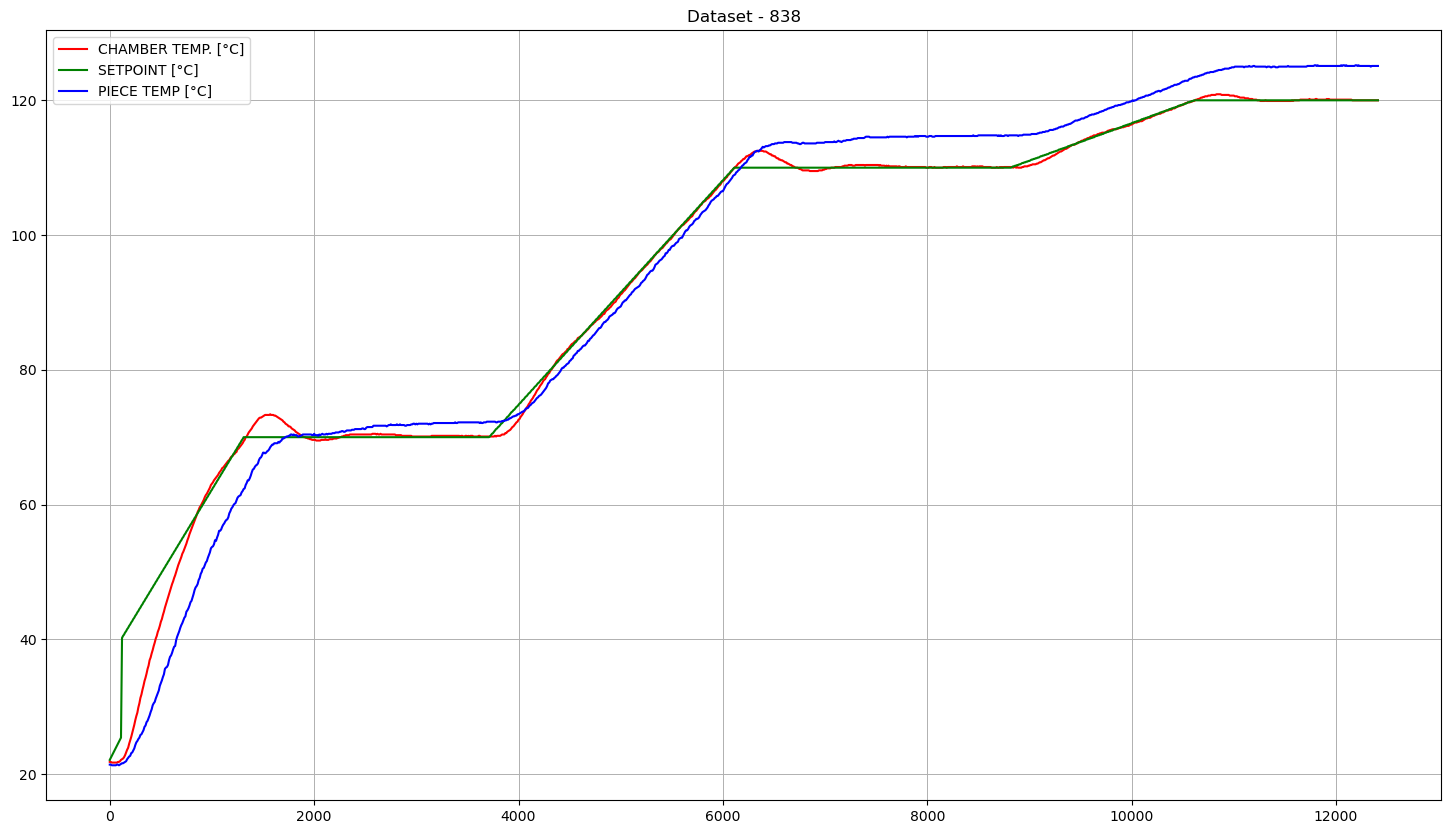

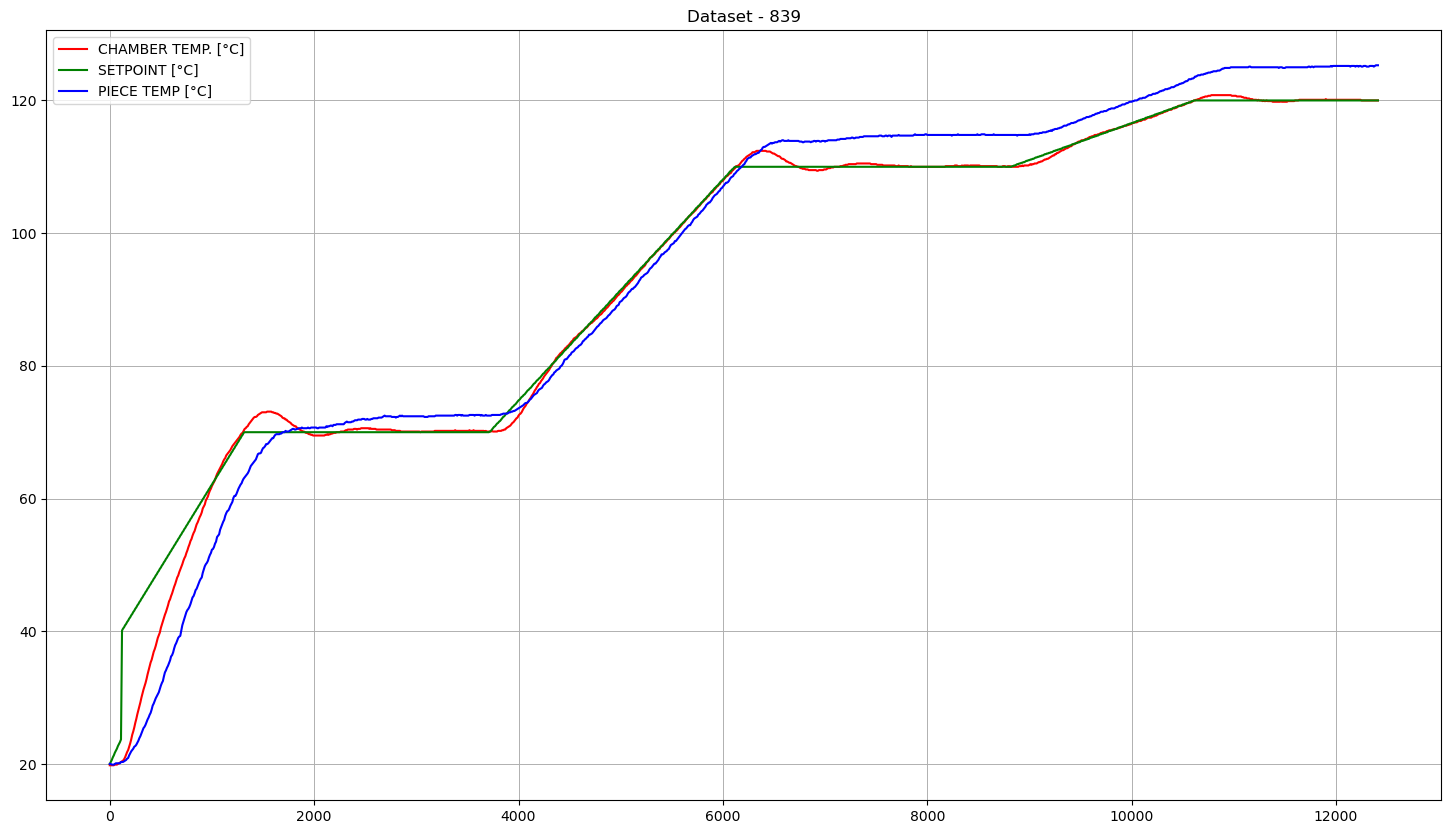

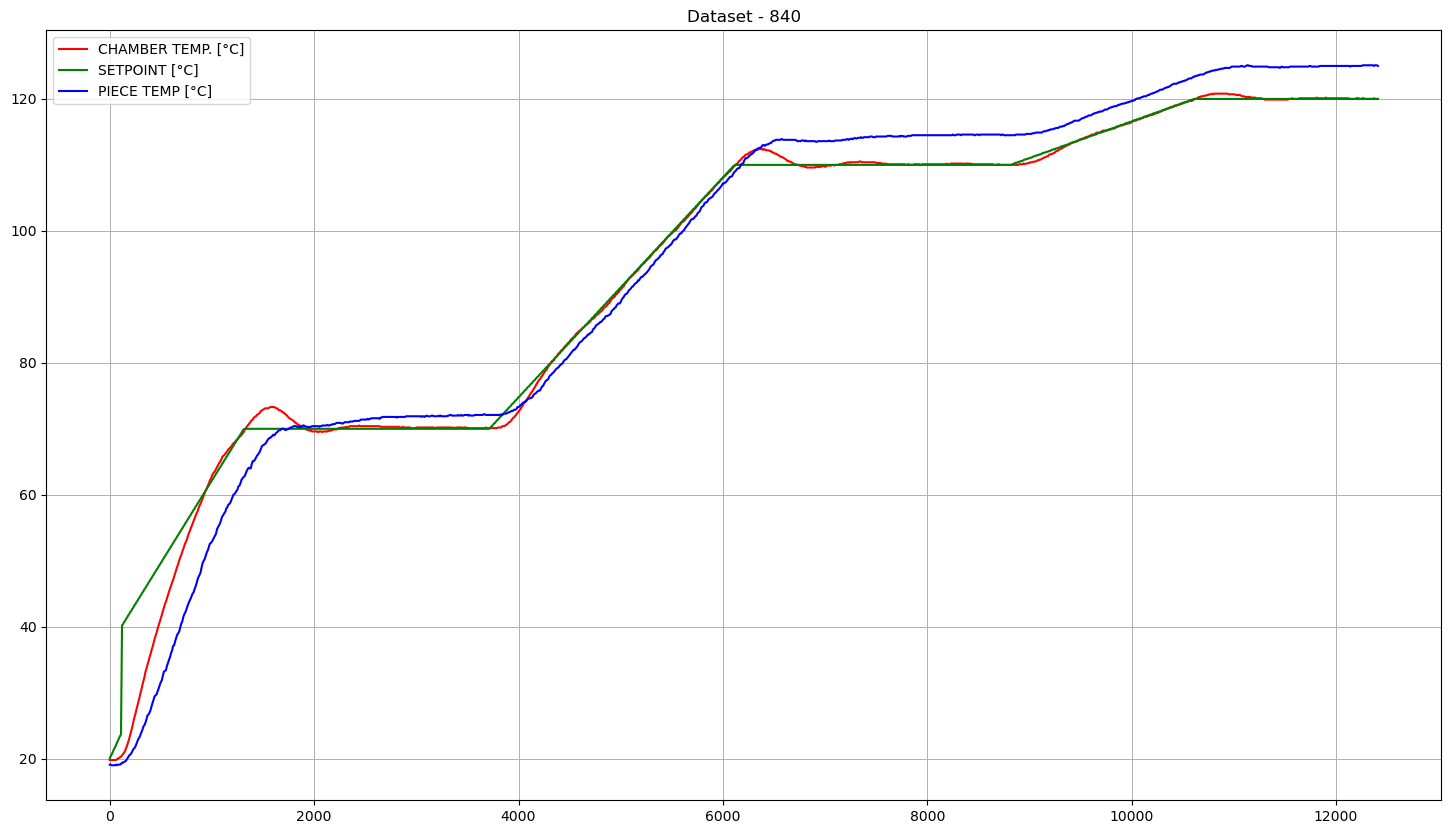

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

In [4]:
for i in files:
    plt.figure(figsize=(18, 10))

    #if i in [850, 851, 852, 856, 858, 859, 861, 862]:
    #if i in [800, 806, 808]:
    if i in [838, 839, 840]:

        df = pd.read_excel(f'../../../data/pilots/CFRP production from Cetma Composites/{i}.xlsx')


        plt.title(f'Dataset - {i}')
        plt.plot(df['Time_sec'], df['CHAMBER TEMP. [°C]'] , color='red', label = f'CHAMBER TEMP. [°C]')
        plt.plot(df['Time_sec'], df['SETPOINT [°C]'] , color='green', label = f'SETPOINT [°C]')
        plt.plot(df['Time_sec'], df['PIECE TEMP [°C]'] , color='blue', label = f'PIECE TEMP [°C]')
        plt.grid(which='major', linestyle='-', linewidth=0.7)
        plt.grid(which='minor', linestyle=':', linewidth=0.4)
        plt.legend()

        

In [25]:
for i in files:
    
    plt.figure(figsize=(18, 10))

    #if i in [850, 851, 852, 856, 858, 859, 861, 862]:
    #if i in [800, 806, 808]:
    #if i in [838, 839, 840, 879]:

    df = pd.read_excel(f'../../../data/pilots/CFRP production from Cetma Composites/{i}.xlsx')

    print(i, np.mean(df['VACUUM mBar']))

    # plt.title(f'Dataset - {i}')
    # # plt.plot(df['Time_sec'], df['CHAMBER TEMP. [°C]'] , color='red', label = f'CHAMBER TEMP. [°C]')
    # # plt.plot(df['Time_sec'], df['SETPOINT [°C]'] , color='green', label = f'SETPOINT [°C]')
    # # plt.plot(df['Time_sec'], df['PIECE TEMP [°C]'] , color='blue', label = f'PIECE TEMP [°C]')
    # plt.plot(df['Time_sec'], df['VACUUM mBar'] , color='blue', label = f'VACUUM mBar')
    # mean_vacuum = np.mean(df['VACUUM mBar'])

    # # Plotting the mean value as a horizontal line
    # plt.axhline(y=mean_vacuum, color='red', label=f'Mean VACUUM mBar')
    # plt.grid(which='major', linestyle='-', linewidth=0.7)
    # plt.grid(which='minor', linestyle=':', linewidth=0.4)
    # plt.legend()

800 -821.4573268921094
806 -821.4597423510467
808 -821.5571658615137
815 -821.512077294686
817 -821.7367149758454
819 -821.4380032206119
821 -821.561191626409
822 -821.2616747181964
824 -821.4500805152979
825 -821.4814814814815
826 -821.5901771336554
827 -821.5128824476651
829 -821.3357487922706
837 -821.720611916264
838 -821.4500805152979
839 -821.5652173913044
840 -821.6256038647343
841 -821.5289855072464
844 -821.4339774557166
845 -821.4178743961353
847 -821.4814814814815


/tmp/ipykernel_485810/3784371641.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(18, 10))


848 -821.427536231884
849 -821.5410628019324
850 -821.4903381642512
851 -821.4935587761674
852 -821.5060337892196
856 -821.6980676328502
858 -821.6376811594203
859 -821.4392598551891
861 -821.7580906148868
862 -821.743156199678
863 -821.2906602254428
864 -821.3341384863124
865 -821.4781553398059
866 -821.5716586151369
875 -821.4903381642512
876 -821.5261464199517
877 -821.4915526950925
878 -821.3929146537843
879 -790.877616747182
880 -821.572463768116
882 -821.6078904991948
883 -821.4307568438003
884 -821.4565217391304
887 -821.7459546925567
890 -821.5507246376811


<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

Minimum temp 838:  -18.200000762939503
Minimum temp 838:  -19.500000000000004
Minimum temp 838:  0.0
Minimum temp 839:  -19.9000015258789
Minimum temp 839:  -20.7000007629394
Minimum temp 839:  0.0
Minimum temp 840:  -19.800001144409205
Minimum temp 840:  -21.6000022888184
Minimum temp 840:  0.0


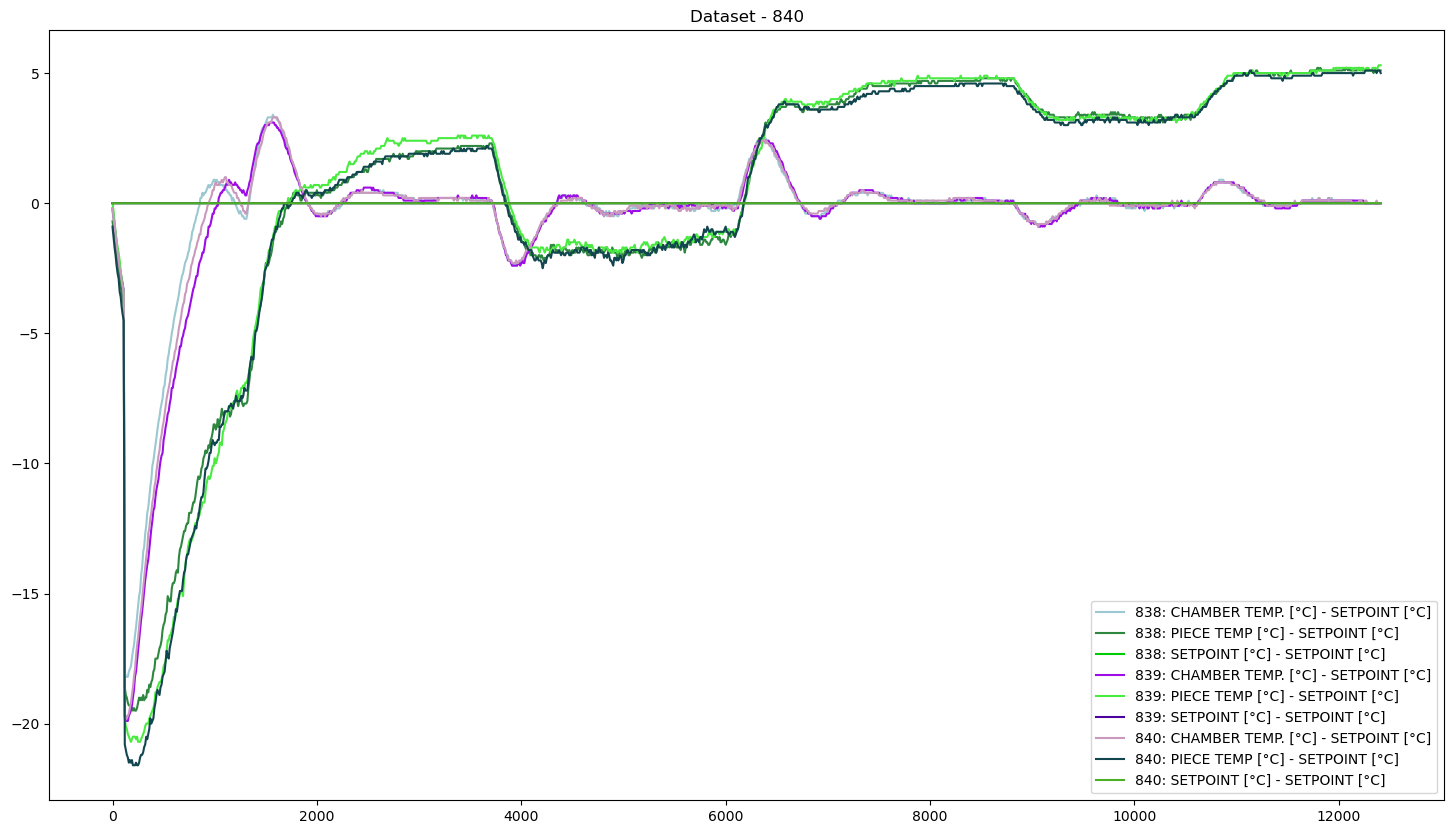

In [5]:
# features = ['CHAMBER TEMP. [°C]', 'PIECE TEMP [°C]', 'VACUUM mBar', 'VACUUM SETPOINT mBar', 'SETPOINT [°C]']
features = ['CHAMBER TEMP. [°C]', 'PIECE TEMP [°C]', 'SETPOINT [°C]']

plt.figure(figsize=(18, 10))

for i in files:

    for f in features:

        df = pd.read_excel(f'../../../data/pilots/CFRP production from Cetma Composites/{i}.xlsx')


        color = random_color()

        # if i in anomalies:
        #     color = 'red'
        #if i in [850, 851, 852, 856, 858, 859, 861, 862]:
        #if i in [800, 806, 808]:
        if i in [838, 839, 840]:
            
            plt.title(f'Dataset - {i}')
        
            plt.plot(df['Time_sec'], df[f]  - df['SETPOINT [°C]'] , color=color, label = f'{i}: {f} - SETPOINT [°C]')
            #plt.plot(df['Time_sec'], df['CHAMBER TEMP. [°C]']  - df['PIECE TEMP [°C]'] , color=color, label = f'chamber - piece')

            plt.legend()

            print(f'Minimum temp {i}: ', np.min((df[f]  - df['SETPOINT [°C]'])))

        if f == 'VACUUM mBar':
            print(f'{i}: ', np.mean(df[f]), np.min(df[f]), np.max(df[f]), np.var(df[f]))
        
 



Correlation matrix

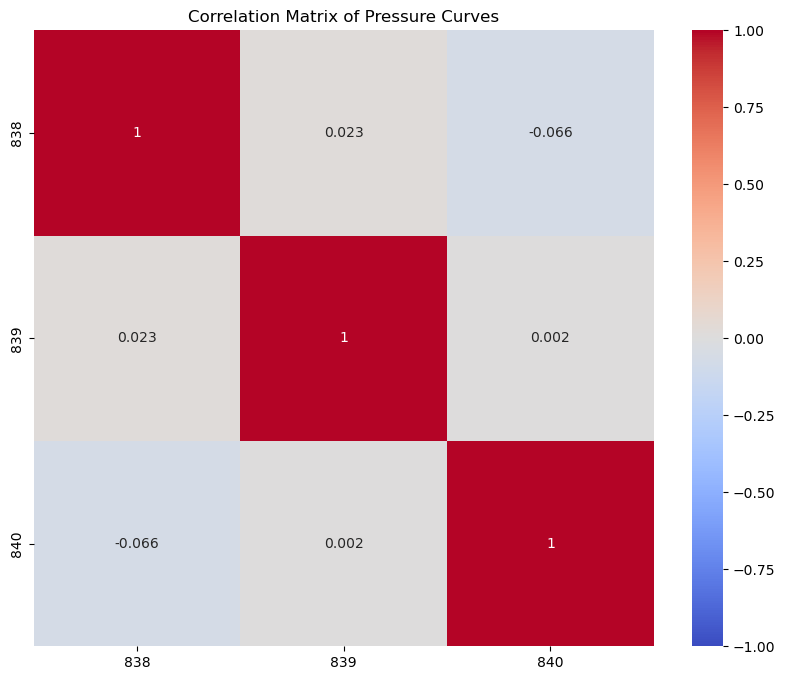

In [6]:
# features = ['CHAMBER TEMP. [°C]', 'PIECE TEMP [°C]', 'VACUUM mBar', 'VACUUM SETPOINT mBar', 'SETPOINT [°C]']
features = ['CHAMBER TEMP. [°C]', 'PIECE TEMP [°C]', 'SETPOINT [°C]']

chamber_piece = pd.DataFrame()
chamber_set = pd.DataFrame()
piece_set = pd.DataFrame()
pressure = pd.DataFrame()

for i in files:

    

    df = pd.read_excel(f'../../../data/pilots/CFRP production from Cetma Composites/{i}.xlsx')


  

    # if i in anomalies:
    #     color = 'red'
    #if i in [850, 851, 852, 856, 858, 859, 861, 862]:
    #if i in [800, 806, 808]:
    if i in [838, 839, 840]:
        
        chamber_piece[str(i)] = (df['CHAMBER TEMP. [°C]']  - df['PIECE TEMP [°C]'])
        chamber_set[str(i)] = (df['CHAMBER TEMP. [°C]']  - df['SETPOINT [°C]'])
        piece_set[str(i)] = (df['PIECE TEMP [°C]']  - df['SETPOINT [°C]'])
        pressure[str(i)] = df['VACUUM mBar']


        # print(f'Minimum chamber_piece {i}: ', np.min((df['CHAMBER TEMP. [°C]']  - df['PIECE TEMP [°C]'])))
        # print(f'Minimum chamber_set {i}: ', np.min((df['CHAMBER TEMP. [°C]']  - df['SETPOINT [°C]'])))
        # print(f'Minimum piece_set {i}: ', np.min((df['PIECE TEMP [°C]']  - df['SETPOINT [°C]'])))


        # print(f'Maximum chamber_piece {i}: ', np.max((df['CHAMBER TEMP. [°C]']  - df['PIECE TEMP [°C]'])))
        # print(f'Maximum chamber_set {i}: ', np.max((df['CHAMBER TEMP. [°C]']  - df['SETPOINT [°C]'])))
        # print(f'Maximumm piece_set {i}: ', np.max((df['PIECE TEMP [°C]']  - df['SETPOINT [°C]'])))

    


# Plot the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(chamber_piece.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix of Temperature Curves')
# plt.show()

# plt.figure(figsize=(10, 8))
# sns.heatmap(chamber_set.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix of Temperature Curves')
# plt.show()


# plt.figure(figsize=(10, 8))
# sns.heatmap(piece_set.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix of Temperature Curves')
# plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(pressure.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pressure Curves')
plt.show()


In [7]:



for i in files:
   

    #if i in [850, 851, 852, 856, 858, 859, 861, 862]:
    #if i in [800, 806, 808]:
    if i in [838, 839, 840]:

        df = pd.read_excel(f'../../../data/pilots/CFRP production from Cetma Composites/{i}.xlsx')

        

       
       

        #print(f"correlation for {i}: ", (df['CHAMBER TEMP. [°C]']  - df['PIECE TEMP [°C]']).corr((df['CHAMBER TEMP. [°C]']  - df['SETPOINT [°C]'])))

        cross_corr = correlate((df['CHAMBER TEMP. [°C]']  - df['PIECE TEMP [°C]']), (df['CHAMBER TEMP. [°C]']  - df['SETPOINT [°C]']), mode='full')

        print(f"{i}: ", np.max(cross_corr), np.argmax(cross_corr))
        #print(f"{i}: ", np.min(cross_corr), np.argmin(cross_corr))
        




838:  3223.110067596429 2400
839:  4095.4794478606727 2374
840:  3617.112010231247 2388


In [8]:



for i in files:
    plt.figure(figsize=(18, 10))

    #if i in [850, 851, 852, 856, 858, 859, 861, 862]:
    #if i in [800, 806, 808]:
    #if i in [838, 839, 840]:

    df = pd.read_excel(f'../../../data/pilots/CFRP production from Cetma Composites/{i}.xlsx')


    plt.title(f'Dataset - {i}')
    plt.plot(df['Time_sec'], df['CHAMBER TEMP. [°C]']  - df['PIECE TEMP [°C]'] , color='red', label = f'CHAMBER TEMP. [°C]  - PIECE TEMP [°C]')
    plt.plot(df['Time_sec'], df['CHAMBER TEMP. [°C]']  - df['SETPOINT [°C]'] , color='green', label = f'CHAMBER TEMP. [°C] - SETPOINT [°C]')
    plt.plot(df['Time_sec'], df['PIECE TEMP [°C]']  - df['SETPOINT [°C]'] , color='blue', label = f'PIECE TEMP [°C]  - SETPOINT [°C]')
    plt.grid(which='major', linestyle='-', linewidth=0.7)
    plt.grid(which='minor', linestyle=':', linewidth=0.4)
    plt.legend()
    plt.savefig(f'figures/{i}.png')
    plt.close()

    #plt.hist(df['CHAMBER TEMP. [°C]']  - df['PIECE TEMP [°C]'], bins=50, alpha=0.7, label='852', color='red')

    differences = df['CHAMBER TEMP. [°C]'] - df['PIECE TEMP [°C]']
    #print(differences.iloc[:15])
    # Create a mask for values within the interval [-1, 1]
    mask = (-1 <= differences) & (differences <= 0.5)

    # Count the number of values that fall within the interval
    count_in_interval = mask.sum()

    # Print the count
    print(f"Number of values within the interval [-1, 0.5] for {i}: {count_in_interval}")

    #print(((df['CHAMBER TEMP. [°C]']  - df['PIECE TEMP [°C]'])==0).count())

Number of values within the interval [-1, 0.5] for 800: 36
Number of values within the interval [-1, 0.5] for 806: 31
Number of values within the interval [-1, 0.5] for 808: 30
Number of values within the interval [-1, 0.5] for 815: 111
Number of values within the interval [-1, 0.5] for 817: 120
Number of values within the interval [-1, 0.5] for 819: 117
Number of values within the interval [-1, 0.5] for 821: 199
Number of values within the interval [-1, 0.5] for 822: 204
Number of values within the interval [-1, 0.5] for 824: 98
Number of values within the interval [-1, 0.5] for 825: 162
Number of values within the interval [-1, 0.5] for 826: 193
Number of values within the interval [-1, 0.5] for 827: 186
Number of values within the interval [-1, 0.5] for 829: 214
Number of values within the interval [-1, 0.5] for 837: 88
Number of values within the interval [-1, 0.5] for 838: 115
Number of values within the interval [-1, 0.5] for 839: 69
Number of values within the interval [-1, 0.5]

In [9]:
df.head()

,Time_sec,SETPOINT [°C],CHAMBER TEMP. [°C],PIECE TEMP [°C],VACUUM mBar,VACUUM SETPOINT mBar
0,0,24.299999,24.200001,24.299999,-823,-821
1,10,24.600000,24.299999,24.400000,-824,-821
2,20,24.799999,24.299999,24.400000,-820,-821
3,30,25.100000,24.299999,24.400000,-816,-821
4,40,25.400000,24.400000,24.500000,-826,-821


Trend decomposition

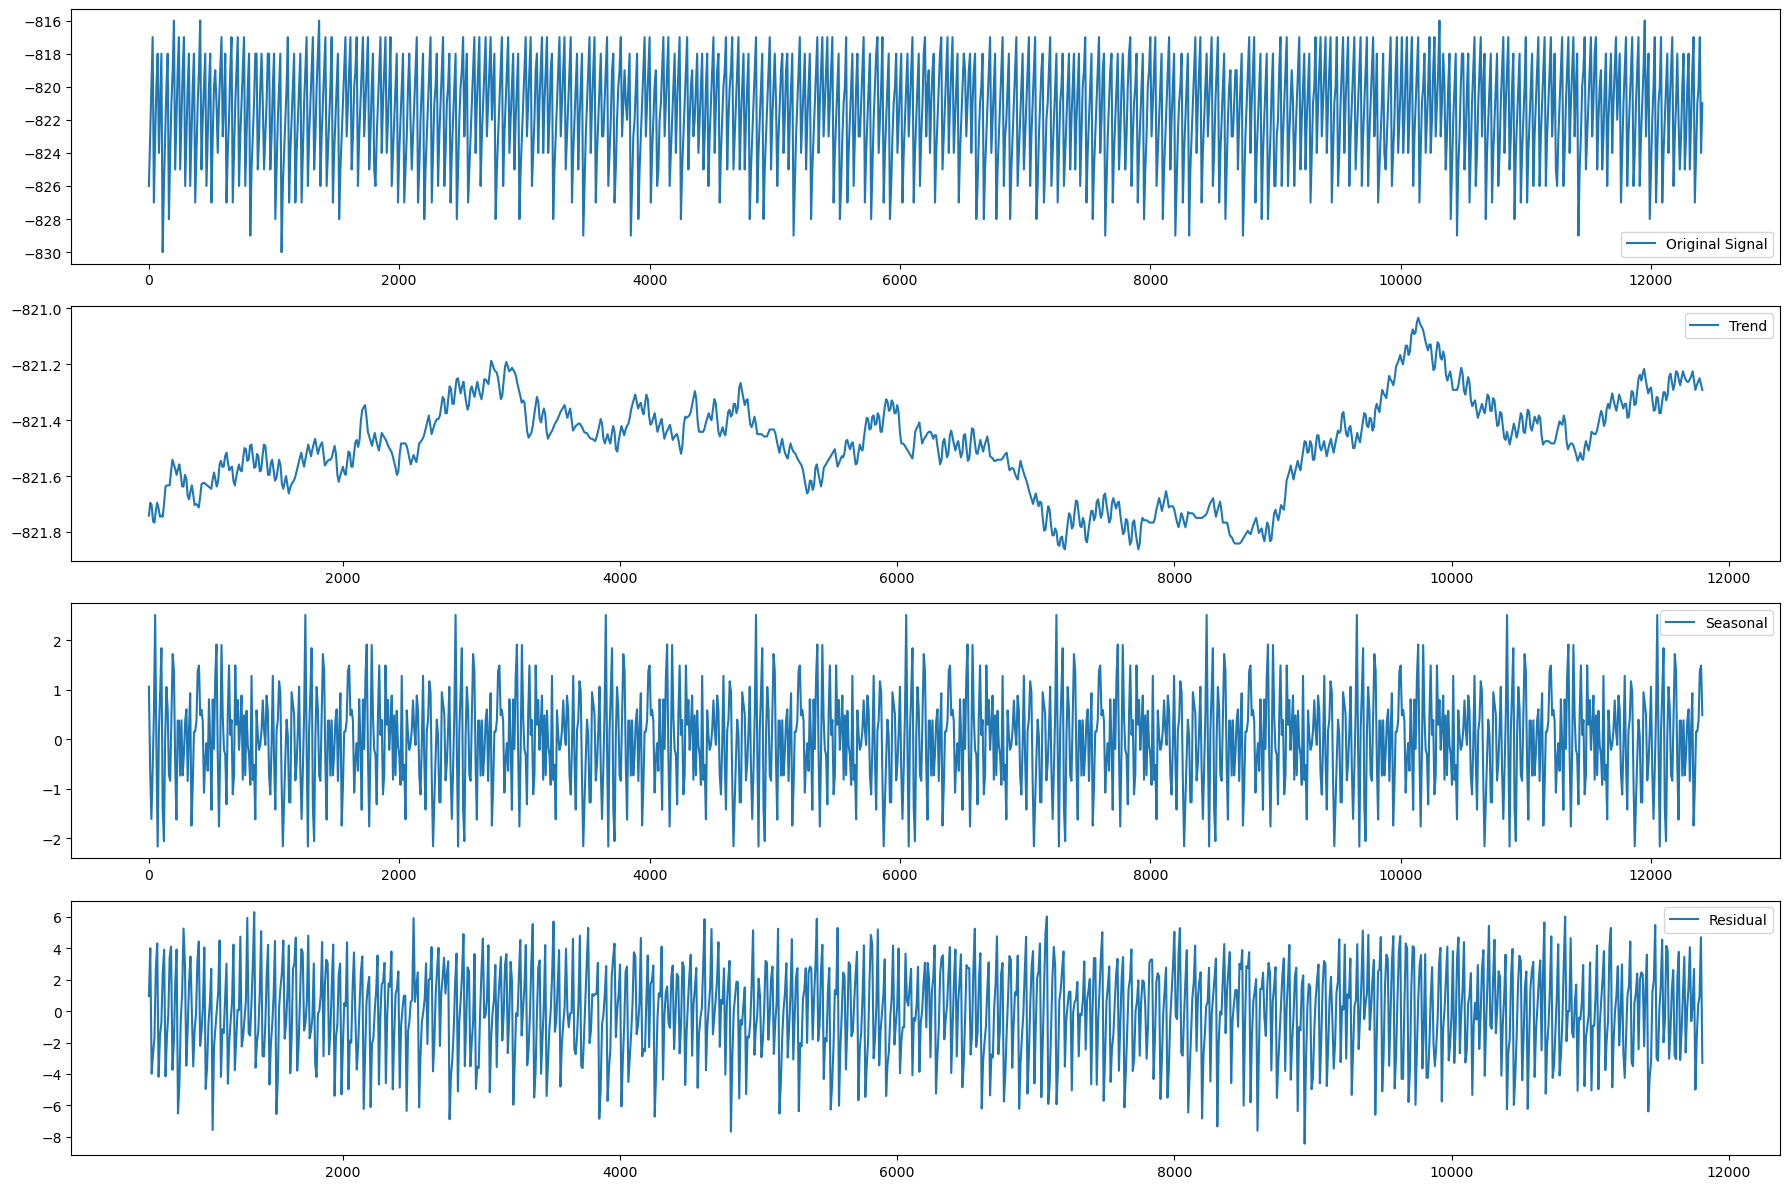

In [10]:


for i in files:

    

    df = pd.read_excel(f'../../../data/pilots/CFRP production from Cetma Composites/{i}.xlsx')


  

    # if i in anomalies:
    #     color = 'red'
    if i in [850]:
        
        
        signal = df['VACUUM mBar']
        time = df['Time_sec']

        decomposition = seasonal_decompose(signal, model='additive', period=120)  # 'period' should be adjusted according to your data

        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid

        # Plot the original signal and its components
        plt.figure(figsize=(18, 12))

        plt.subplot(411)
        plt.plot(time, signal, label='Original Signal')
        plt.legend(loc='best')

        plt.subplot(412)
        plt.plot(time, trend, label='Trend')
        plt.legend(loc='best')

        plt.subplot(413)
        plt.plot(time, seasonal, label='Seasonal')
        plt.legend(loc='best')

        plt.subplot(414)
        plt.plot(time, residual, label='Residual')
        plt.legend(loc='best')

        plt.tight_layout()
        plt.show()
            



In [11]:
df = pd.read_excel(f'../../../data/pilots/CFRP production from Cetma Composites/process data REV2 16-05-24.xlsx', skiprows=1)


In [12]:
df.head()

,Cycle date,Item,Operator,PREPREG LOT,DAYS AFTER PREPREG PRODUCTION,tool,cycles after tool manteinance,Curve,quality result\n%,reason of defect,Colonna2
0,2024-02-15,M33402,CA,8-24,3,CH1,16,800,100,NaN,NaN
1,2024-02-20,S311464,CA,8-24,3,CH1,17,806,100,NaN,NaN
2,2024-02-21,LO41679,GA,8-24,4,CH1,18,808,0,operator,NaN
3,2024-02-27,S311508,CA,8-24,10,CH1,19,815,100,NaN,NaN
4,2024-02-28,S311521,CA,8-24,11,CH1,20,817,100,NaN,NaN


In [13]:

c = np.arange(0, 57, 8)[1:]
clusters = [[] for _ in range(len(c))]
print(c)
for i in range(len(df)):
    for j_idx, j in enumerate(c[1:], start=1):
        if df['DAYS AFTER PREPREG PRODUCTION'].iloc[i] <= j and df['DAYS AFTER PREPREG PRODUCTION'].iloc[i] > c[j_idx-1]:
            clusters[j_idx].append(df['Curve'].iloc[i])
    if df['DAYS AFTER PREPREG PRODUCTION'].iloc[i] <= c[0]: 
            clusters[0].append(df['Curve'].iloc[i])

clusters = clusters[:-1]
print(clusters)

[ 8 16 24 32 40 48 56]
[[800, 806, 808, 824, 825, 826, 827, 887, 890], [815, 817, 819, 821, 822, 829, 837, 838, 839, 840], [841, 844, 845, 847, 848, 849, 880], [850, 851, 852, 856, 858, 882, 883, 884], [859, 861, 862, 863, 864], [865, 866, 875]]


In [14]:
# All thresholds
Thresholds1 = []
Thresholds2 = []
Thresholds3 = []

#Mean differences in piece temperature and setpoint between thresholds
MeanDifTempT1 = []
MeanDifTempT2 = []
MeanDifTempT3 = []
MeanDifTempT4 = []

#Maximum piece temperature for file
MaxPieceTemps = []

#Speed of warming
SpeedsOfWarming1 = []
SpeedsOfWarming2 = []

#Measured Vaccum Averages and variances
VaccumAvgs = []
VaccumVar = []

In [15]:
def custom_round(number):
    last_digit = number % 10
    if last_digit < 5:
        return number - last_digit
    else:
        return number + (10 - last_digit)


In [16]:
# for file in files[:7]:
    
#     df = pd.read_excel(f'../../../data/pilots/CFRP production from Cetma Composites/{file}.xlsx')

#     alpha = 0.1  # Smoothing parameter (0 < alpha < 1)
#     df['Smoothed PIECE TEMP [°C]'] = df['PIECE TEMP [°C]'].ewm(alpha=alpha, adjust=False).mean()
#     #df.plot(y='smoothed', legend=False)
#     data = df['Smoothed PIECE TEMP [°C]'].values
#     # Select the model and method
#     model = "rbf"  # Other models could be "l2", "rbf", etc.

#     time = df['Time_sec'].values
#     temp = df['Smoothed PIECE TEMP [°C]'].values

#     # Apply change point detection
#     model = "rbf"  # Using RBF model for change point detection
#     algo = rpt.Pelt(model=model, min_size=200, jump=10).fit(temp)
#     change_points = algo.predict(pen=50)

#     # Filter change points to only include significant increases
#     filtered_points = []
#     for cp in change_points:
#         if cp == 0 or cp >= len(temp):
#             continue
#         if np.mean(temp[cp:cp+10]) > np.mean(temp[cp-10:cp]):
#             filtered_points.append(cp)

#     # Convert filtered points to actual time values
#     filtered_times = time[filtered_points]

#     # Plot the results
#     plt.figure(figsize=(12, 6))
#     plt.plot(time, temp, label='Smoothed PIECE TEMP [°C]')
#     for ft in filtered_times:
#         plt.axvline(ft, color='r', linestyle='--', linewidth=2, label='Key Point' if ft == filtered_times[0] else "")
#     plt.xlabel('Time (sec)')
#     plt.ylabel('Smoothed PIECE TEMP [°C]')
#     plt.title('Smoothed PIECE TEMP [°C] with Key Points')
#     plt.legend()
#     plt.show()
    
#     df1 = df.loc[0:result[0]]
#     df2 = df.loc[result[0]:result[1]]
#     df3 = df.loc[result[1]:result[2]]
#     df4 = df.loc[result[2]:]

#     Thresholds1.append(df.loc[result[0]]['PIECE TEMP [°C]'])
#     Thresholds2.append(df.loc[result[1]]['PIECE TEMP [°C]'])
#     Thresholds3.append(df.loc[result[2]]['PIECE TEMP [°C]'])
    
#     MeanDifTempT1.append((df1['SETPOINT [°C]'] - df1['PIECE TEMP [°C]']).mean())
#     MeanDifTempT2.append((df2['SETPOINT [°C]'] - df2['PIECE TEMP [°C]']).mean())
#     MeanDifTempT3.append((df3['SETPOINT [°C]'] - df3['PIECE TEMP [°C]']).mean())
#     MeanDifTempT4.append((df4['SETPOINT [°C]'] - df4['PIECE TEMP [°C]']).mean())

#     #Maximum piece temperature for file
#     MaxPieceTemps.append(df['PIECE TEMP [°C]'].max())

#     #Measured Vaccum Averages and variances
#     VaccumAvgs.append(df['VACUUM mBar'].mean())
#     VaccumVar.append(df['VACUUM mBar'].var())
    
#     #Speeds 1
    
#     X = df1['Time_sec'].values.reshape(-1, 1)  # Reshape to a 2D array 
#     y = df1['PIECE TEMP [°C]'].values 
#     model = LinearRegression()
#     model.fit(X, y)
#     SpeedsOfWarming1.append(model.coef_[0])
    
#     #Speed 2
    
#     X = df3['Time_sec'].values.reshape(-1, 1)  # Reshape to a 2D array 
#     y = df3['PIECE TEMP [°C]'].values 
#     model = LinearRegression()
#     model.fit(X, y)
#     SpeedsOfWarming2.append(model.coef_[0])    

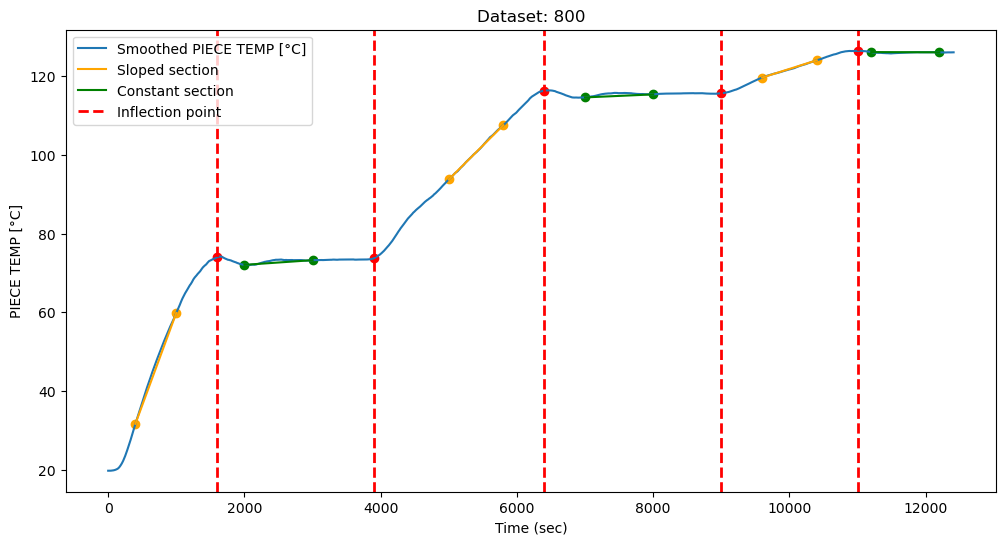

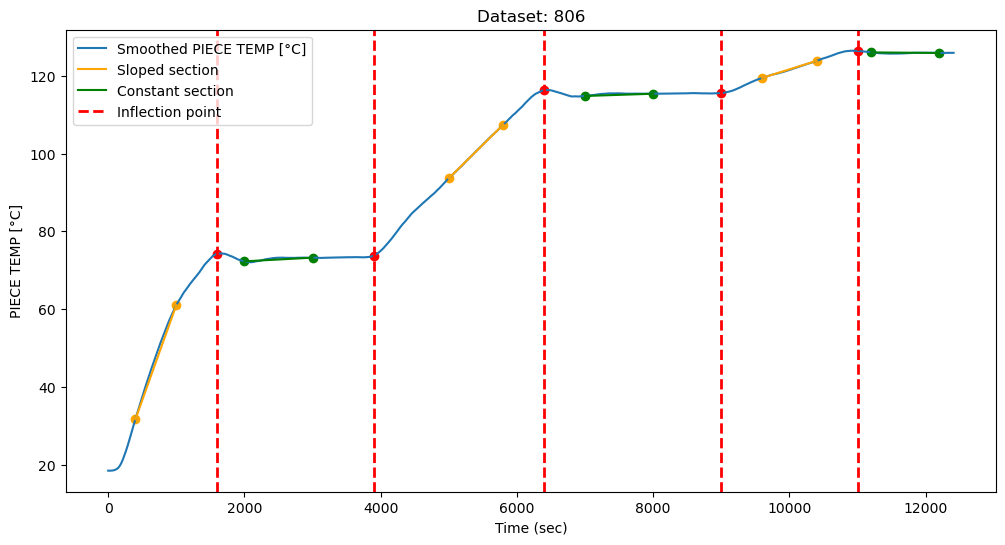

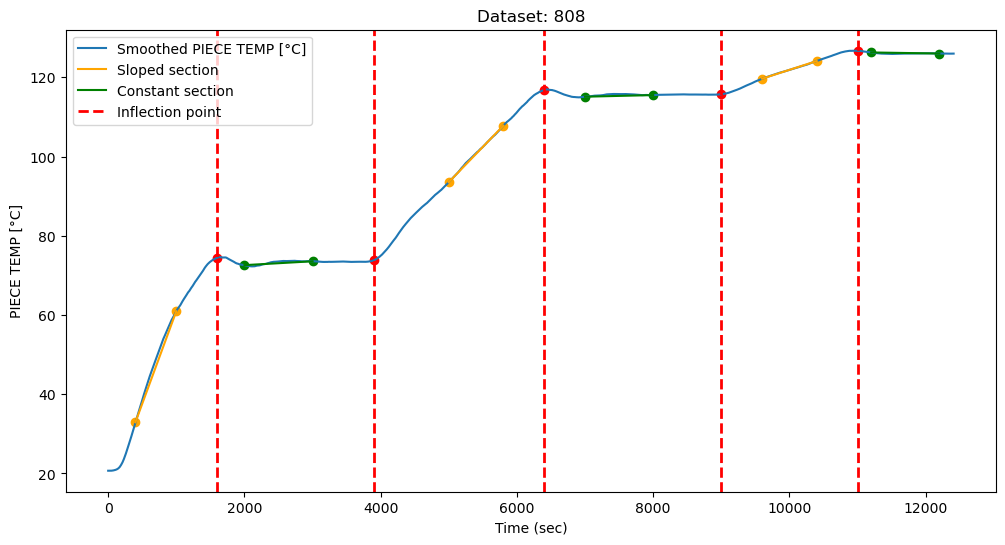

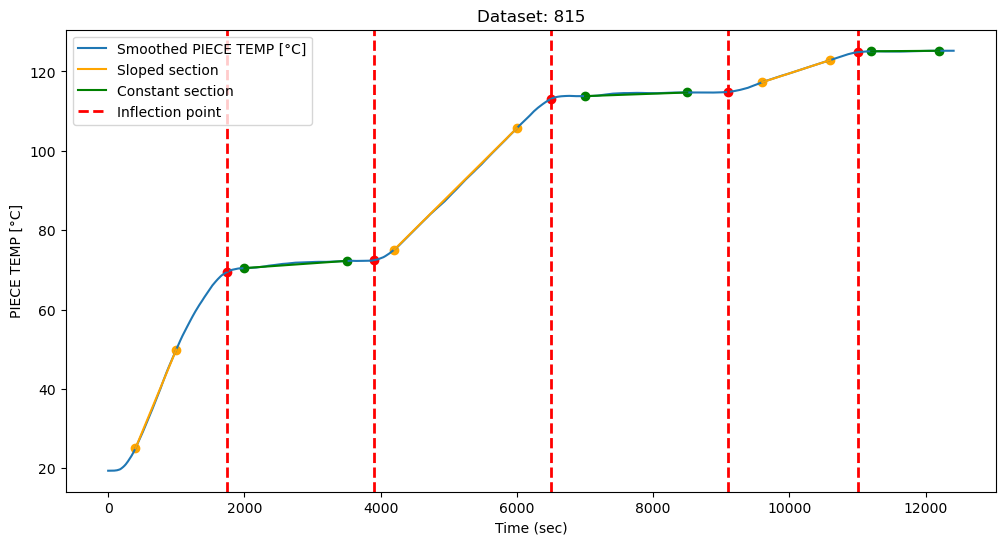

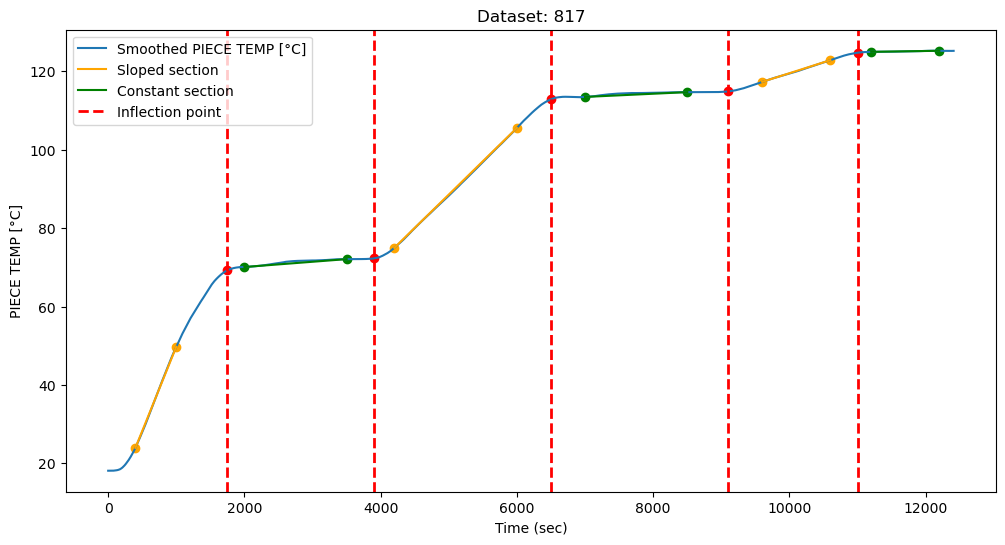

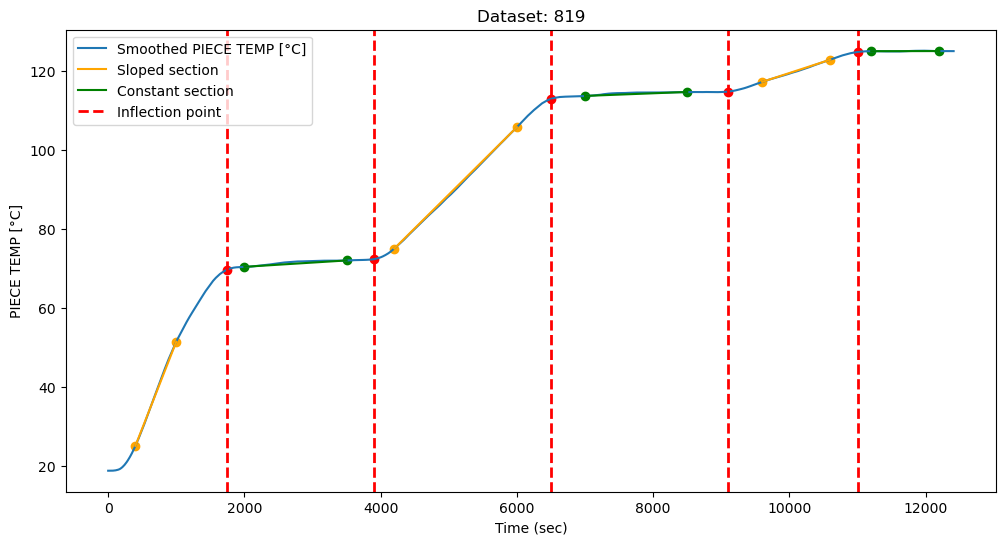

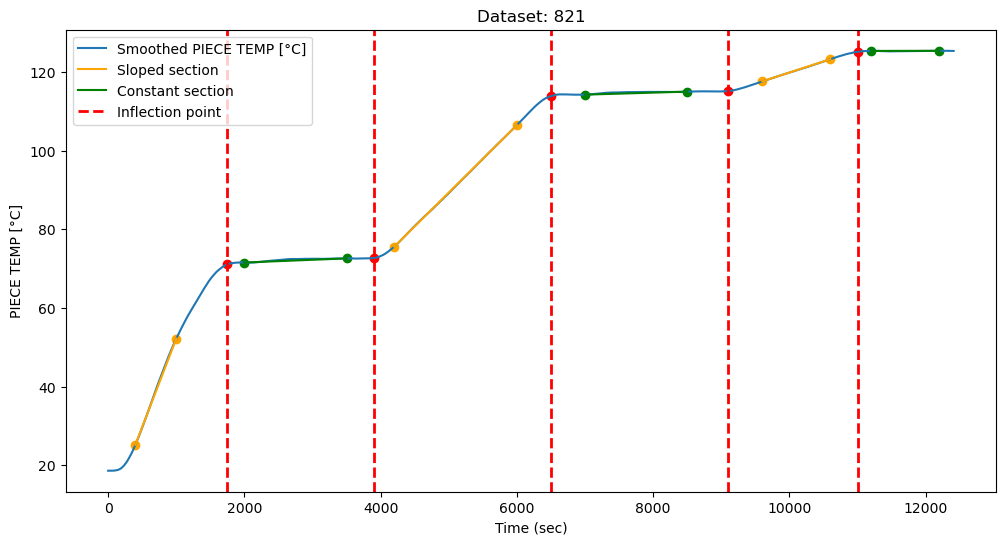

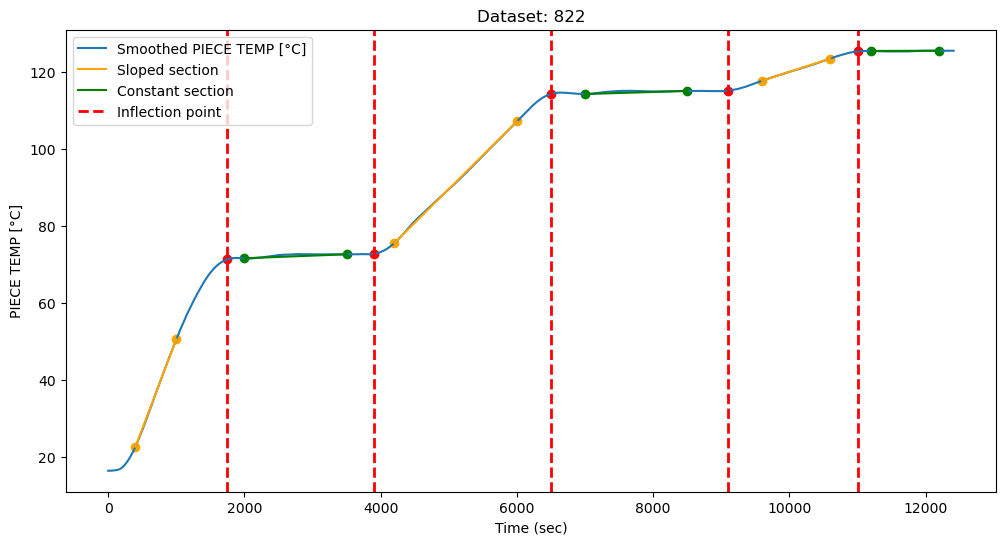

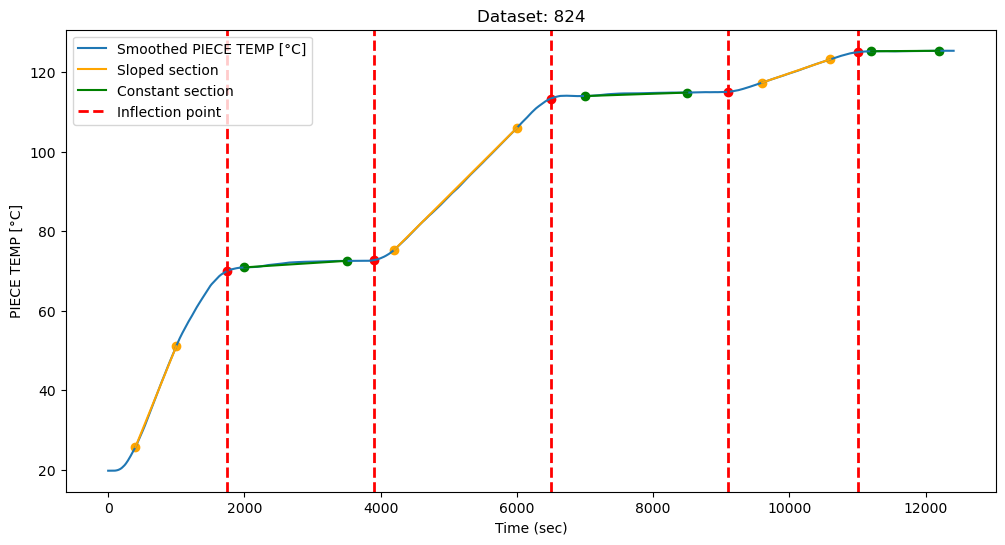

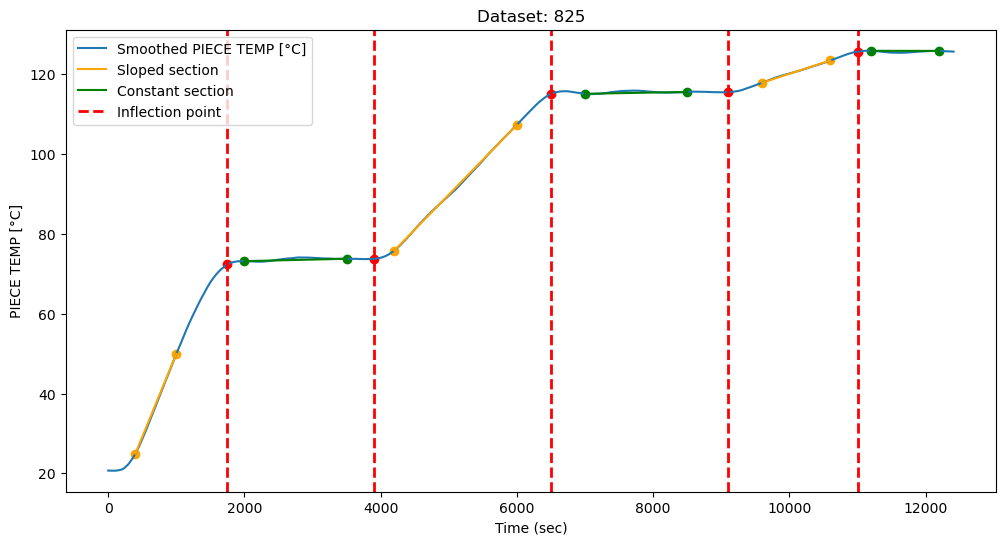

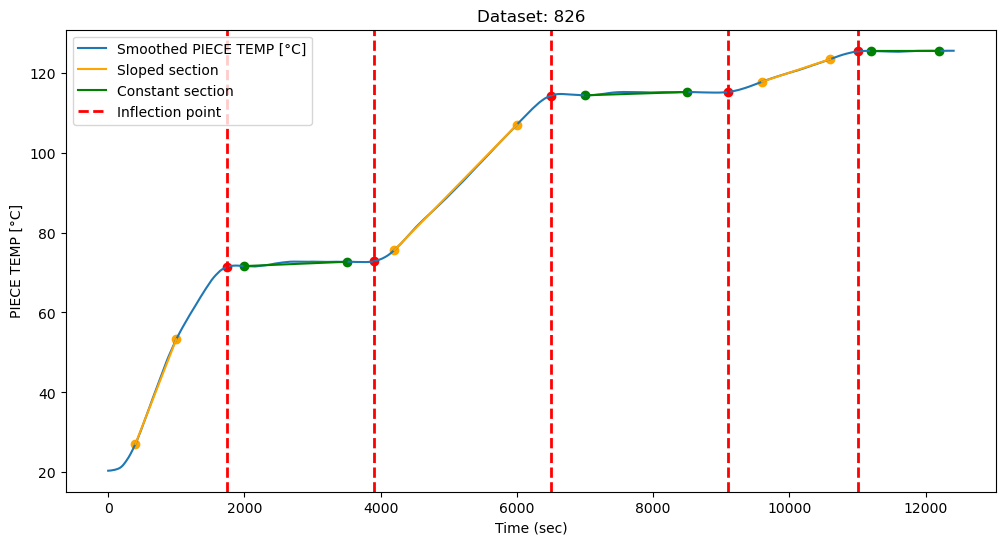

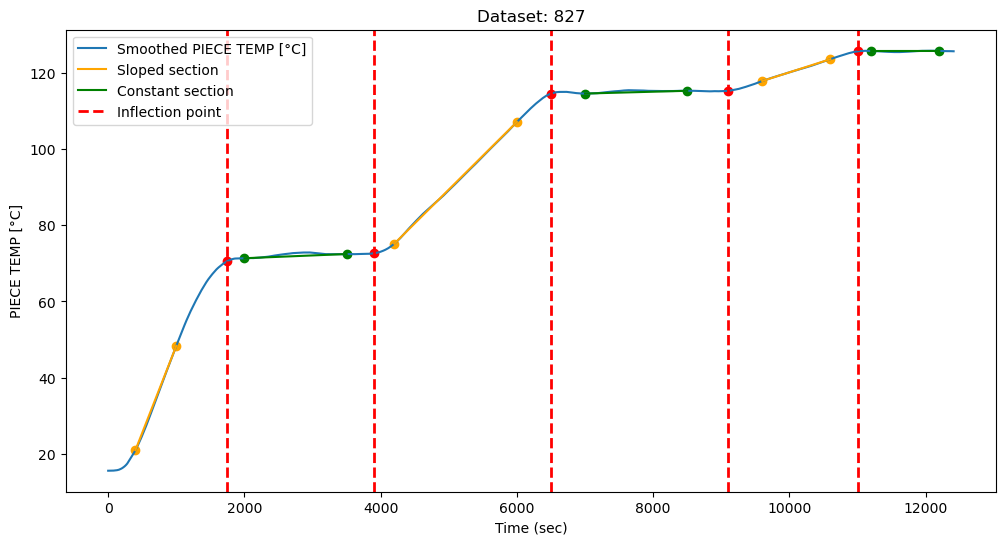

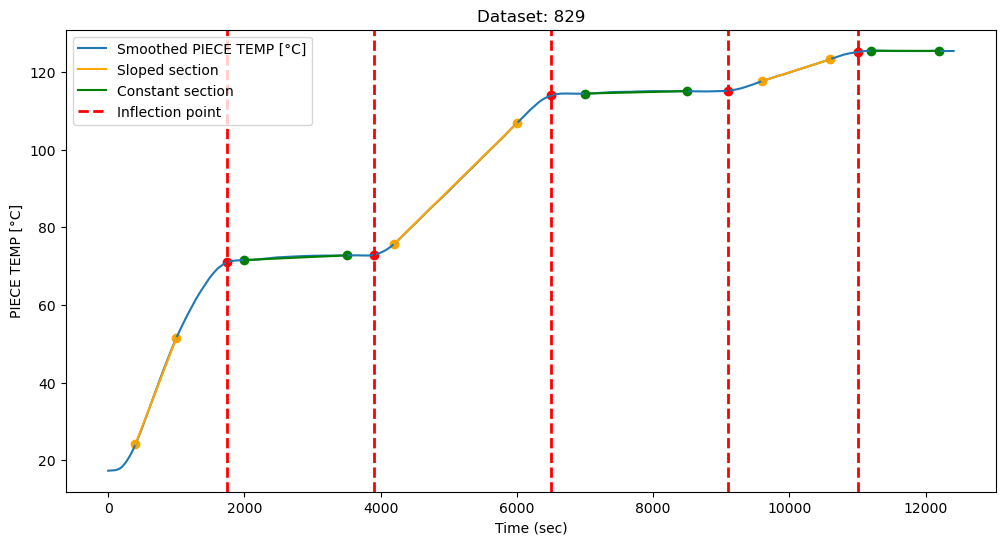

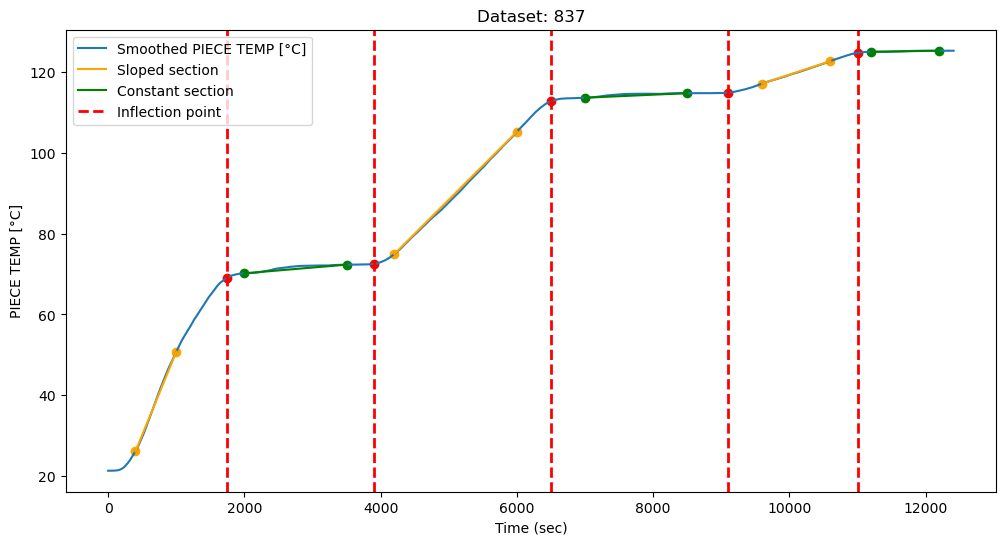

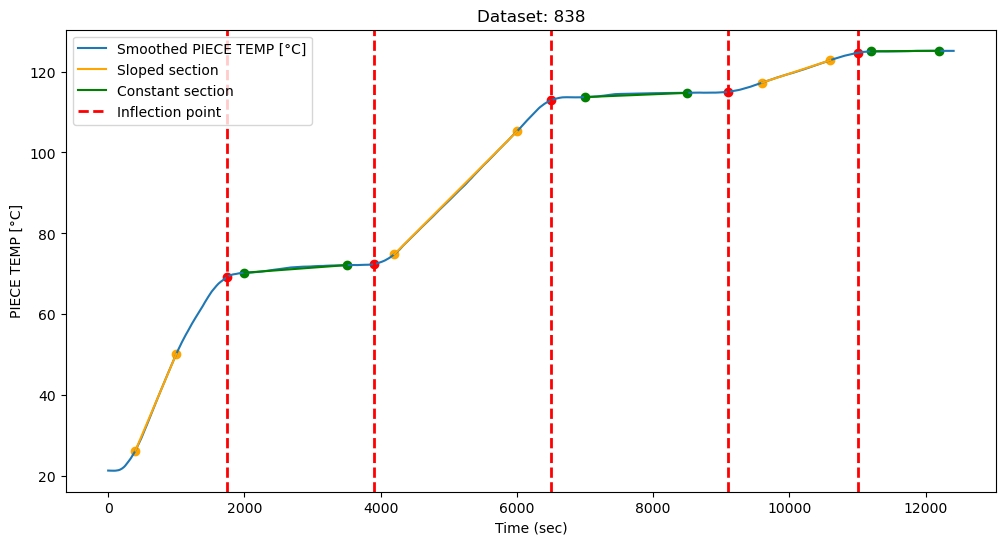

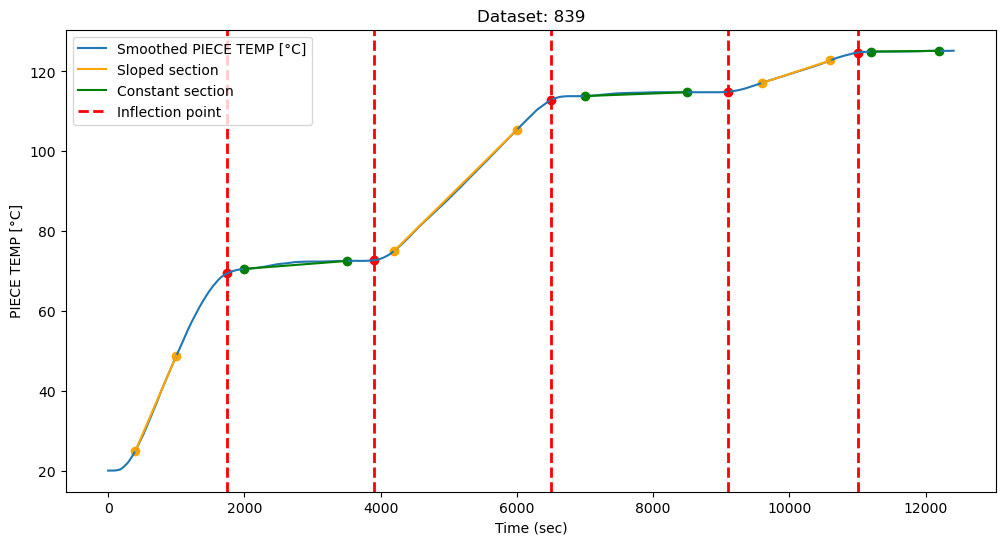

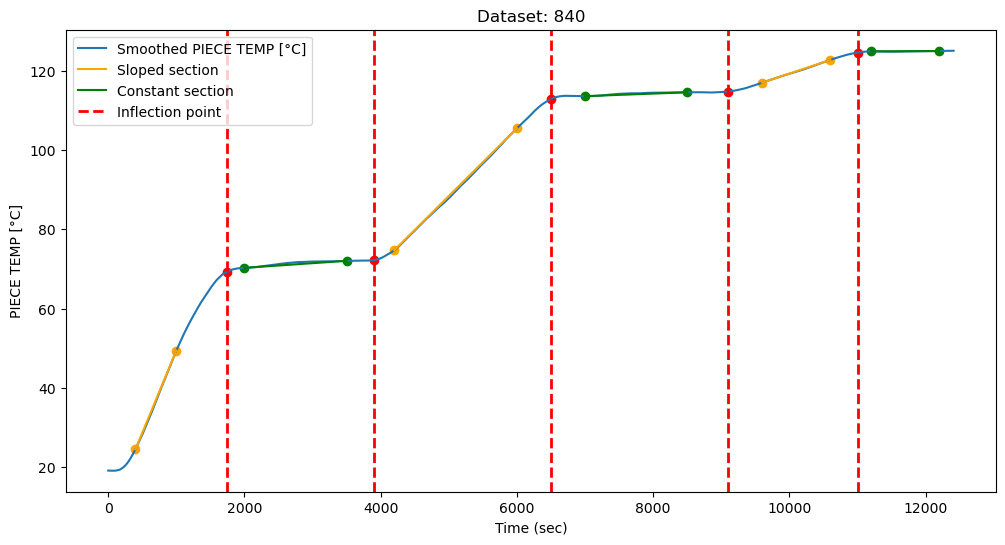

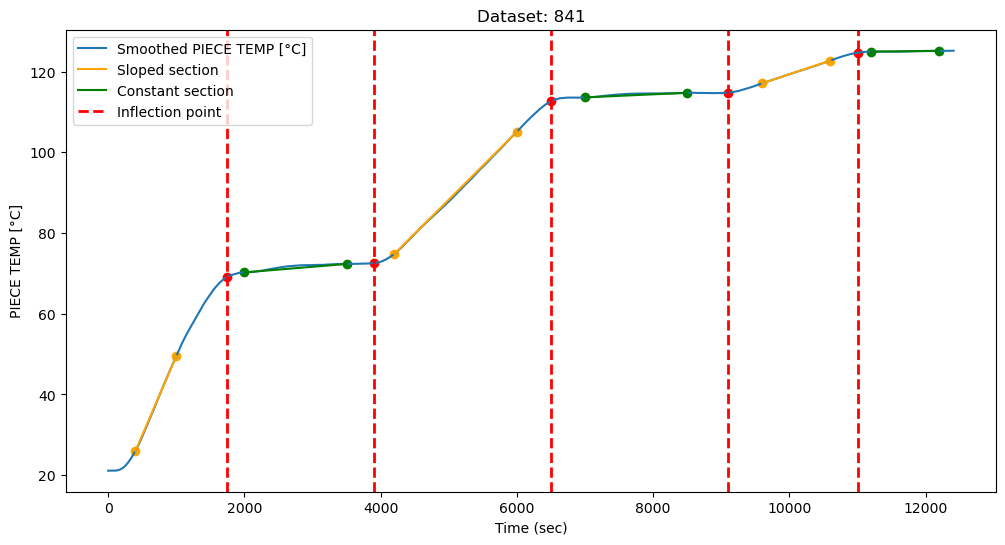

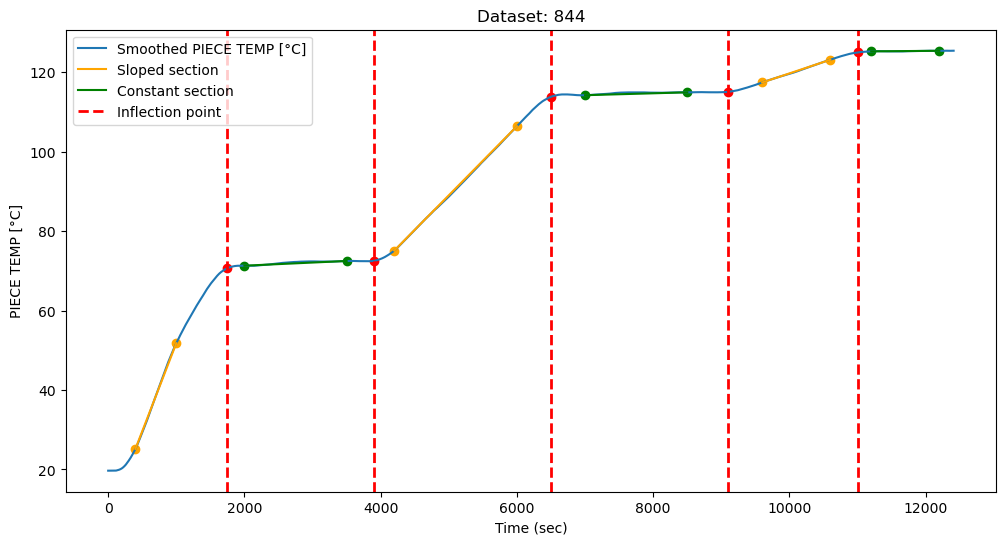

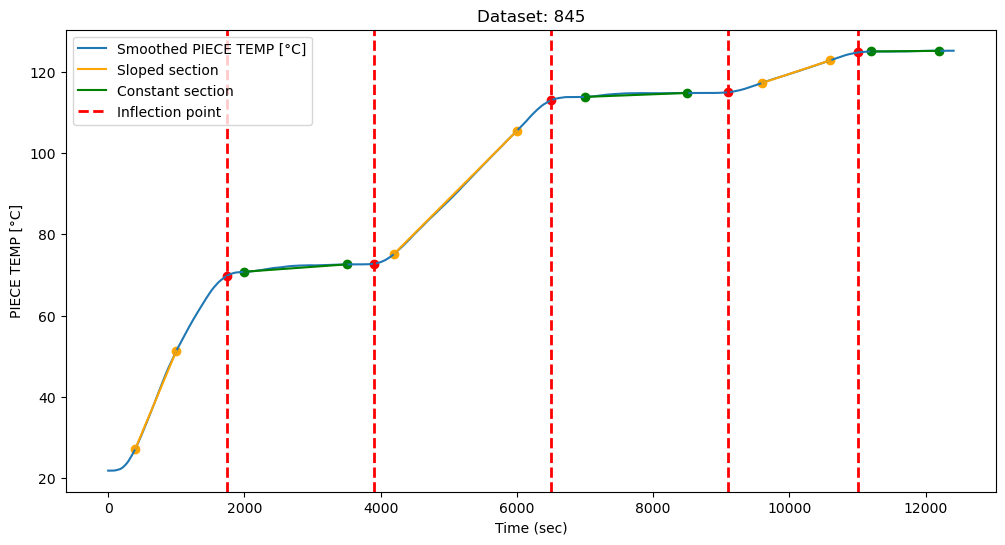

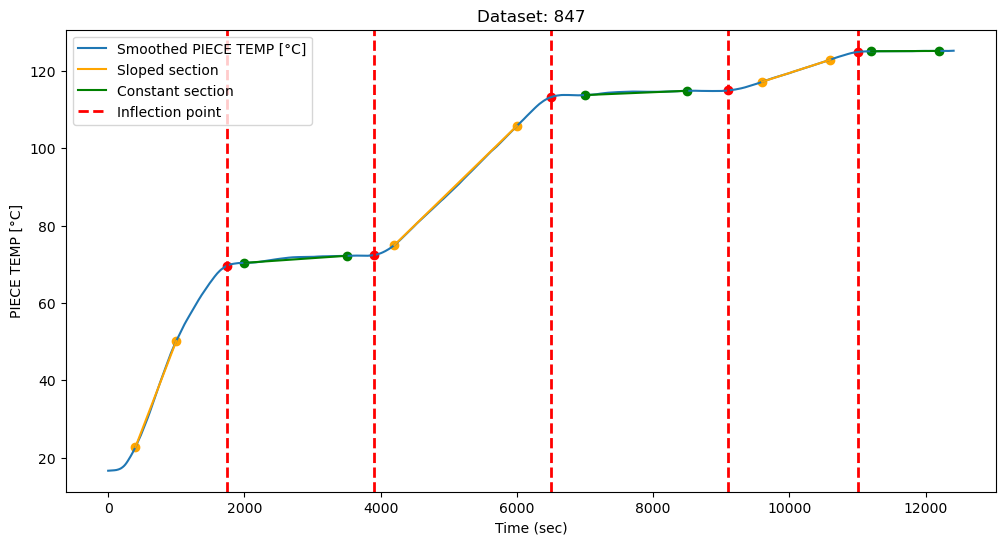

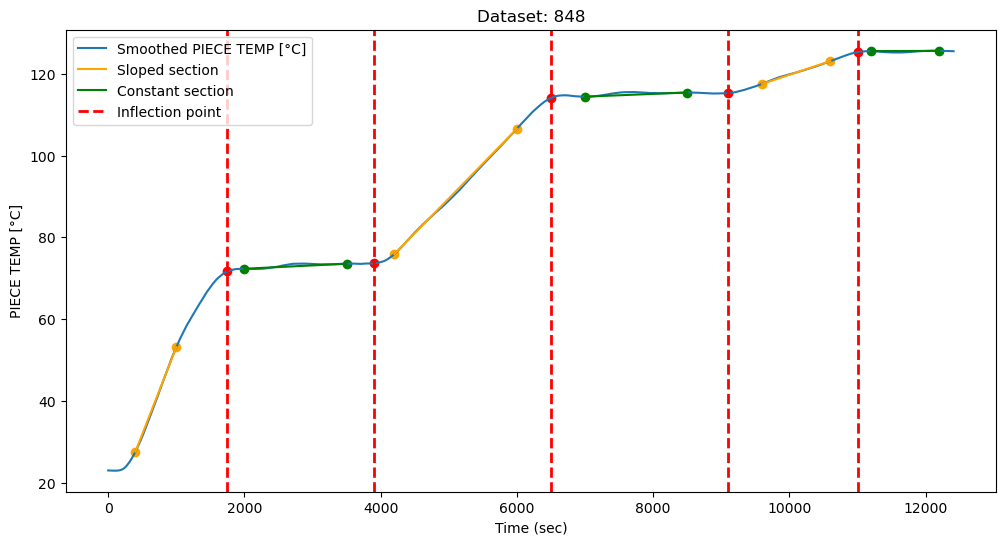

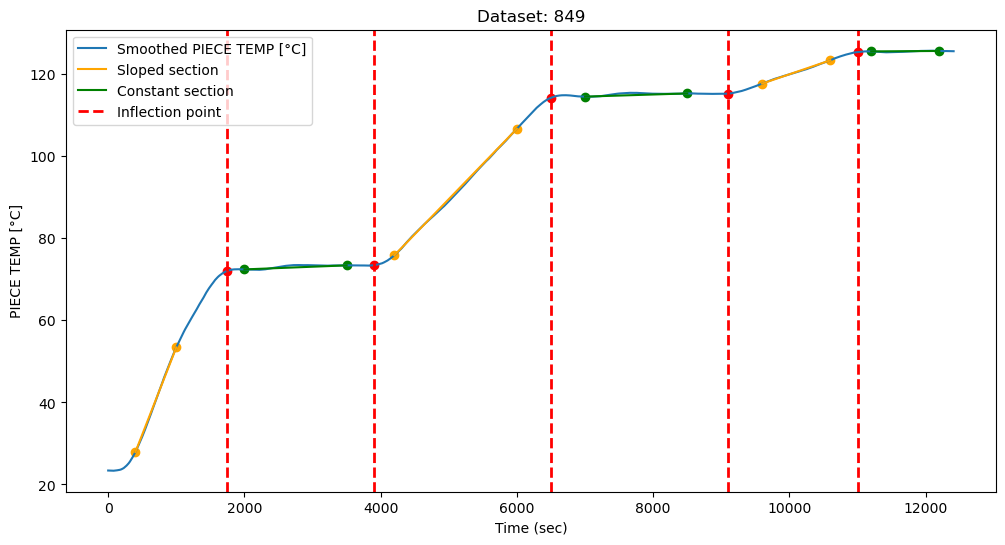

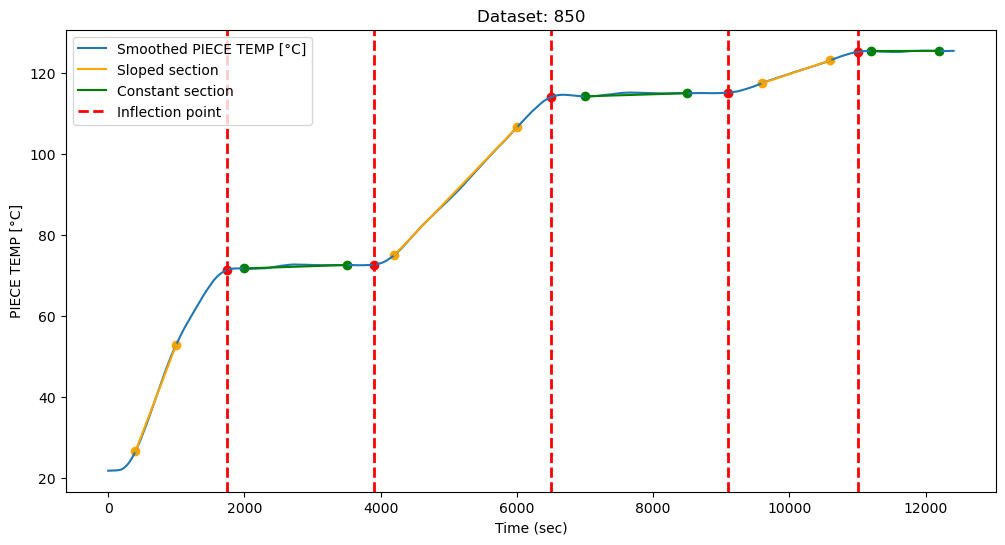

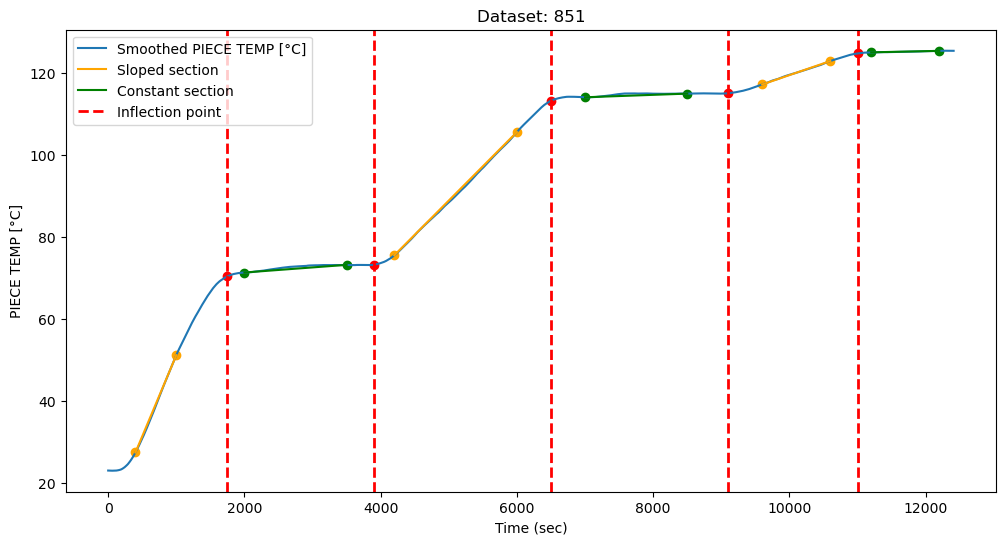

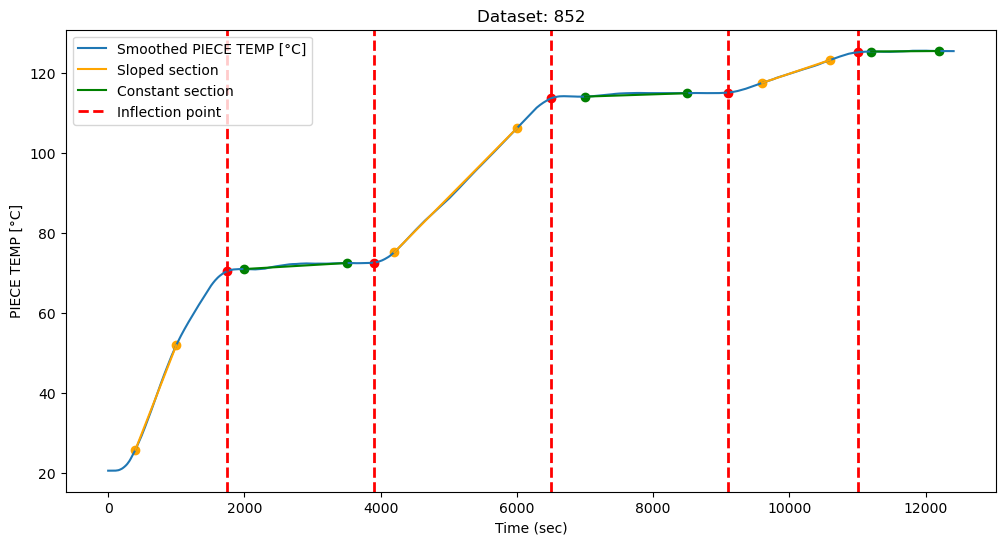

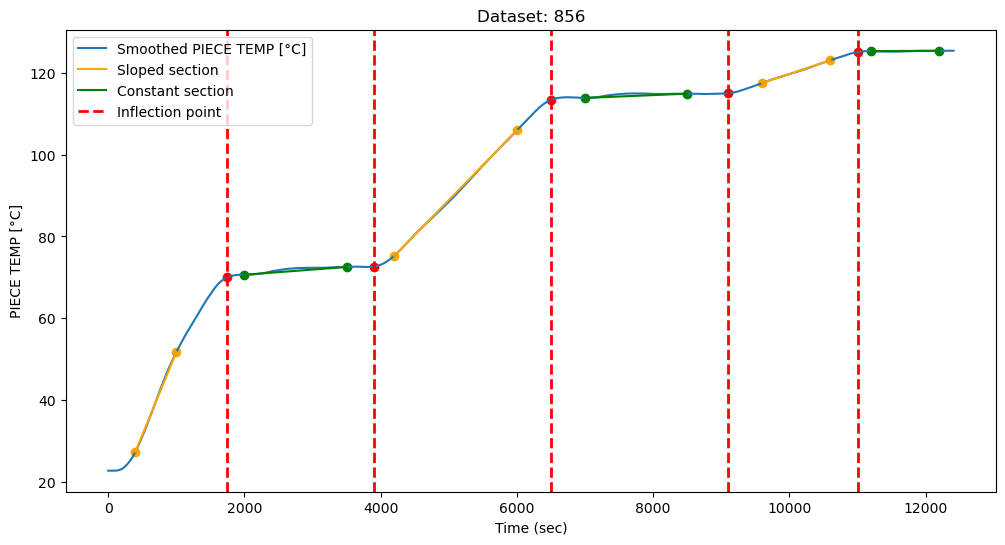

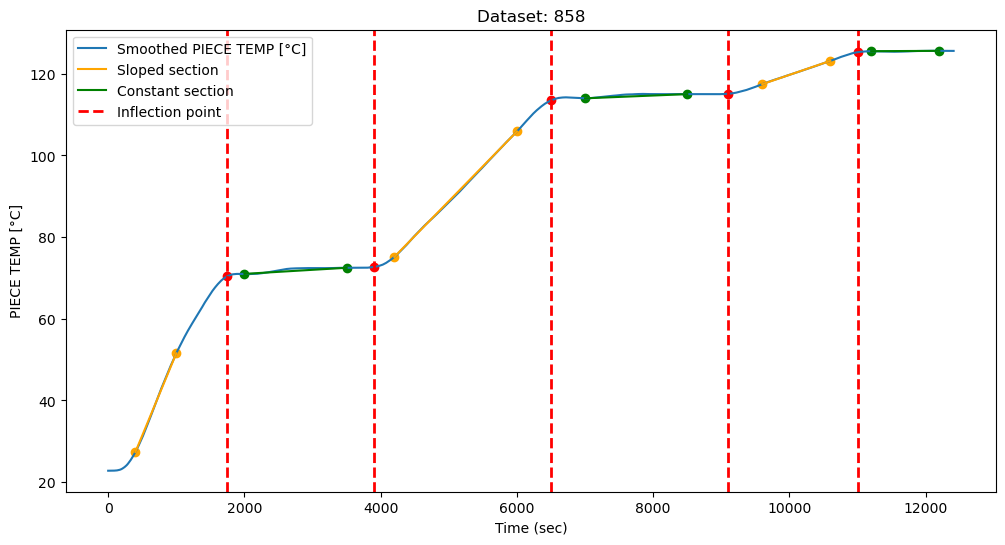

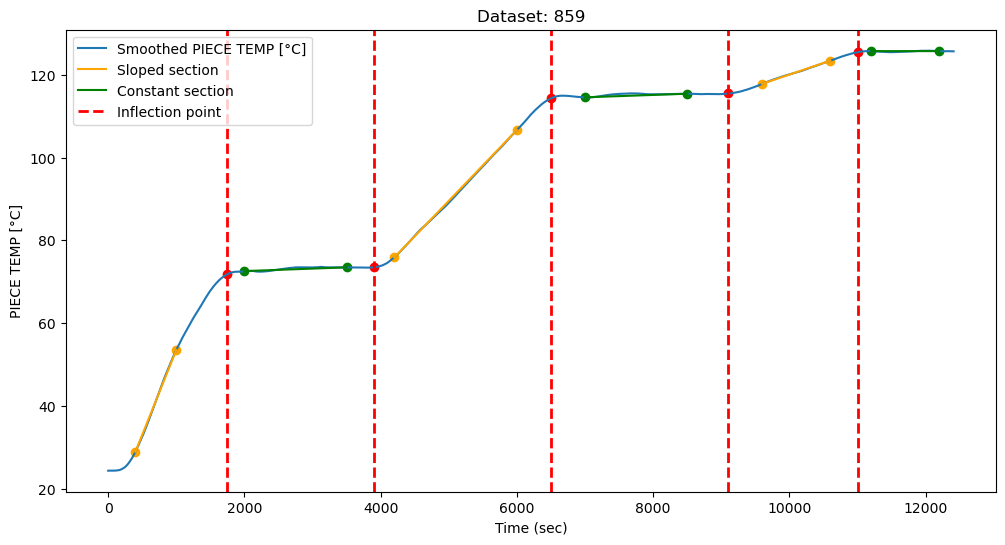

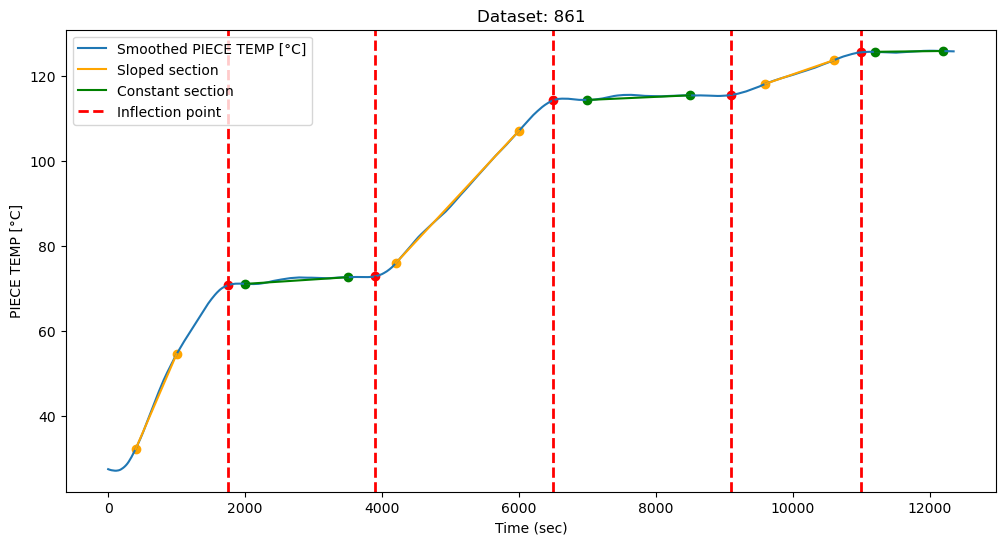

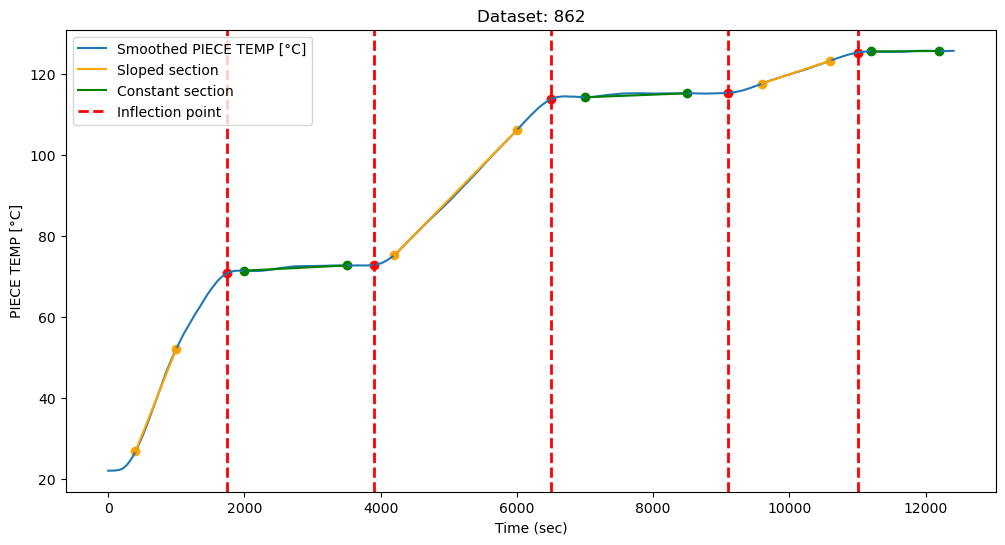

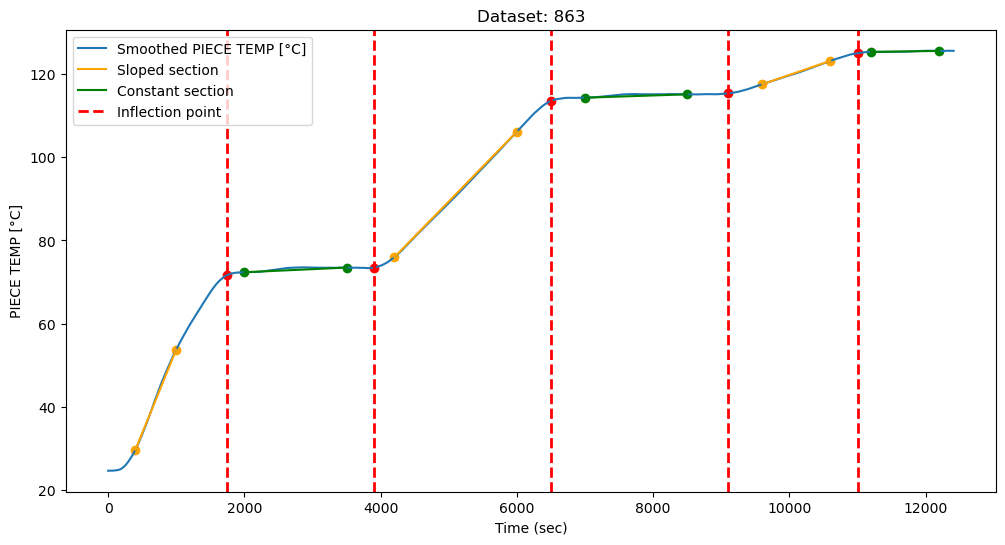

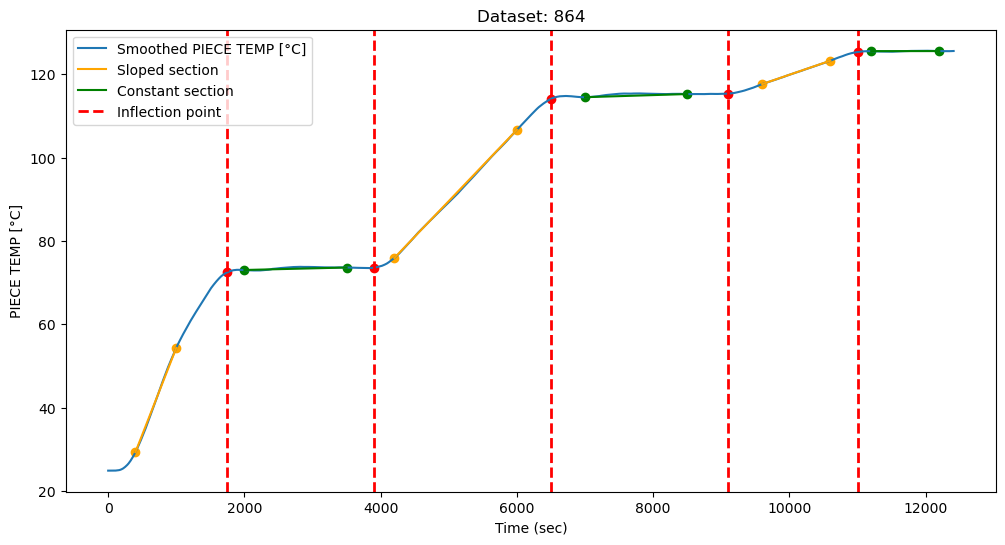

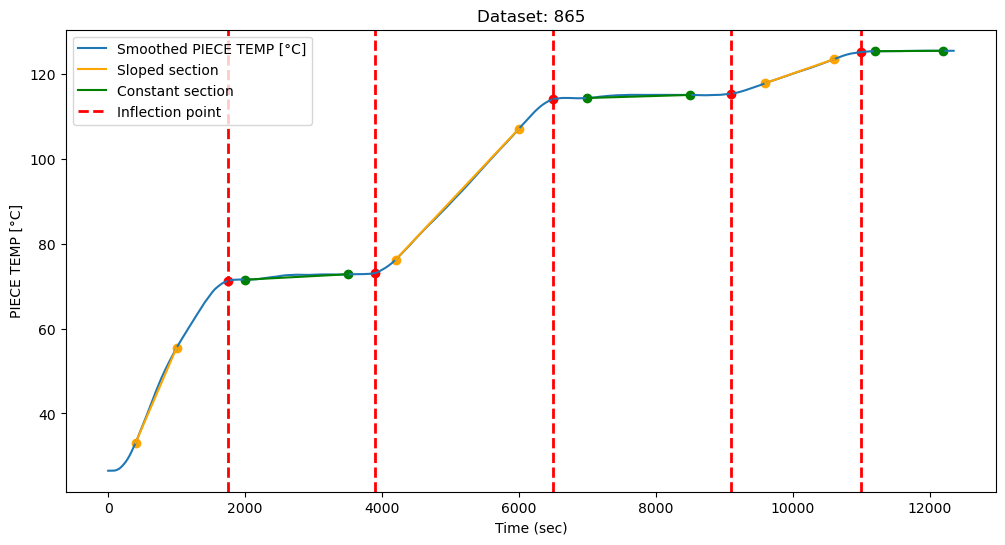

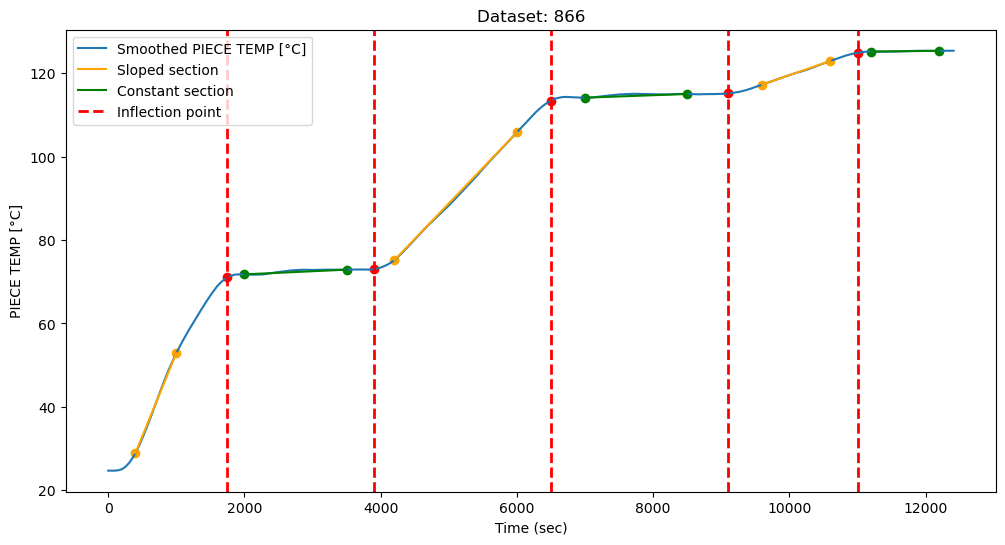

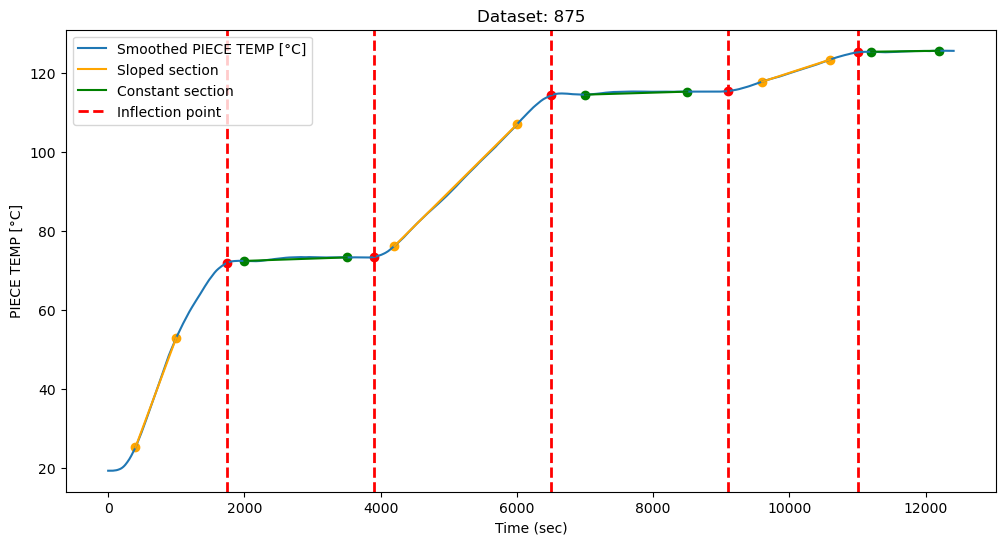

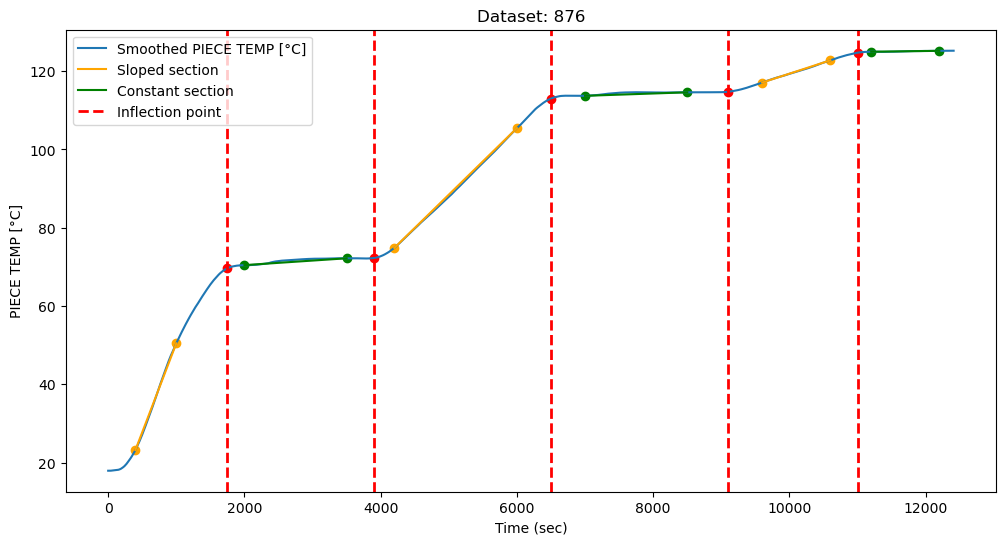

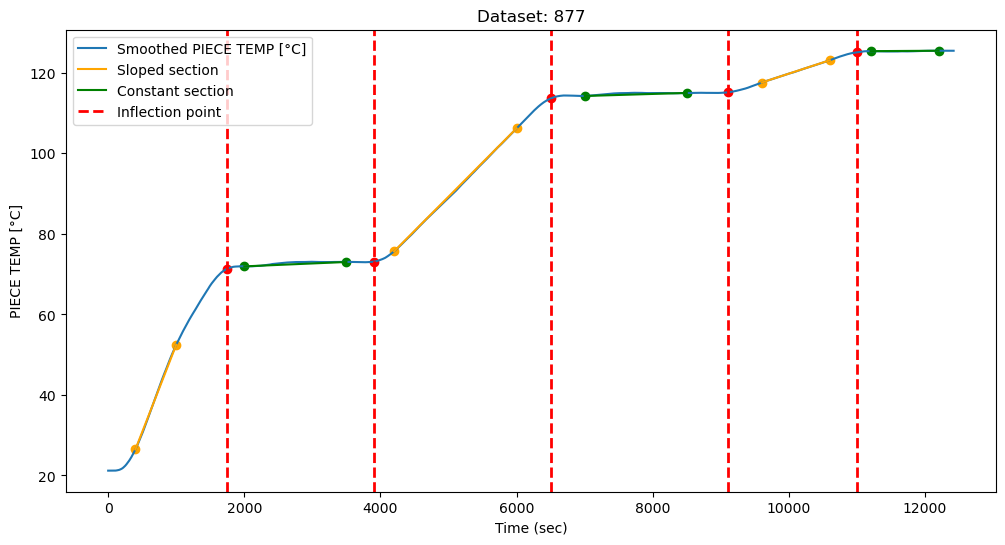

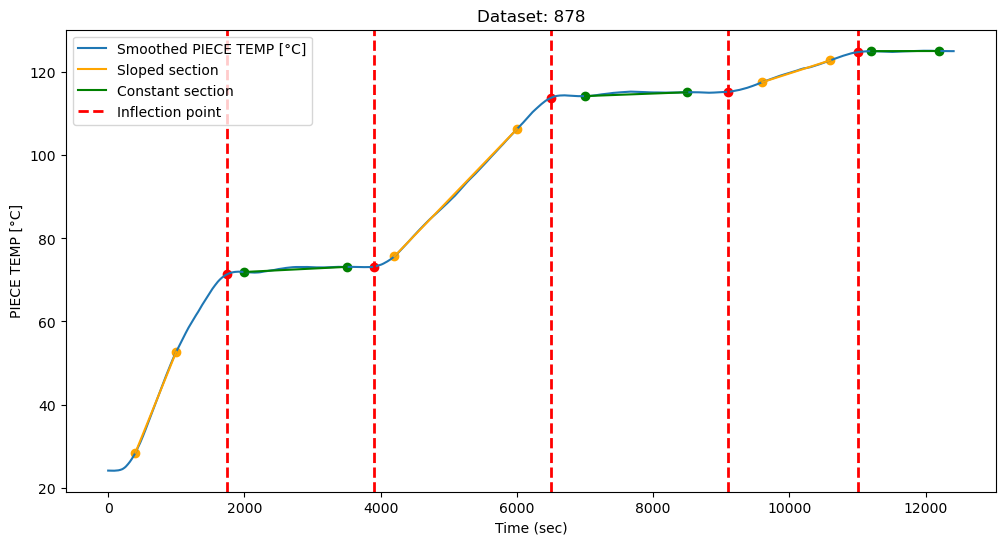

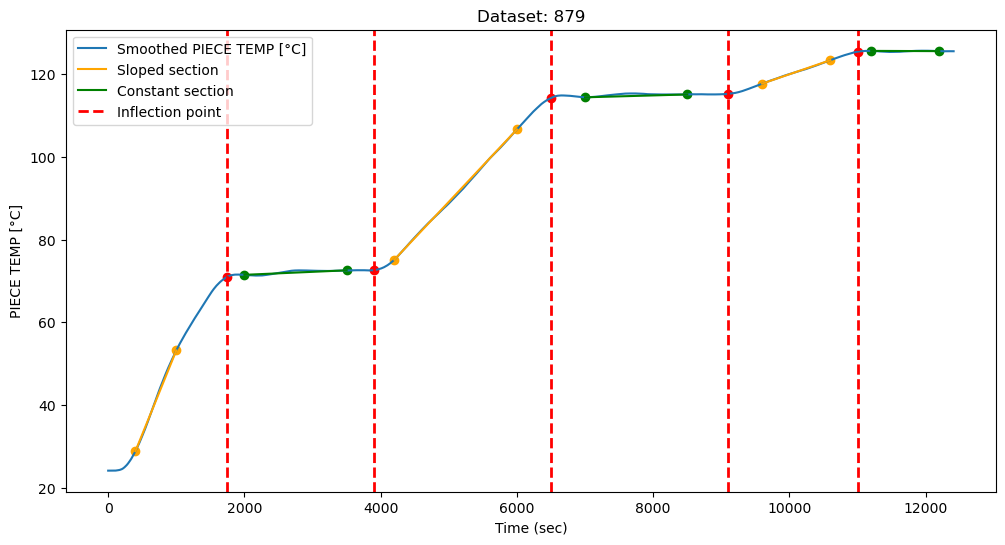

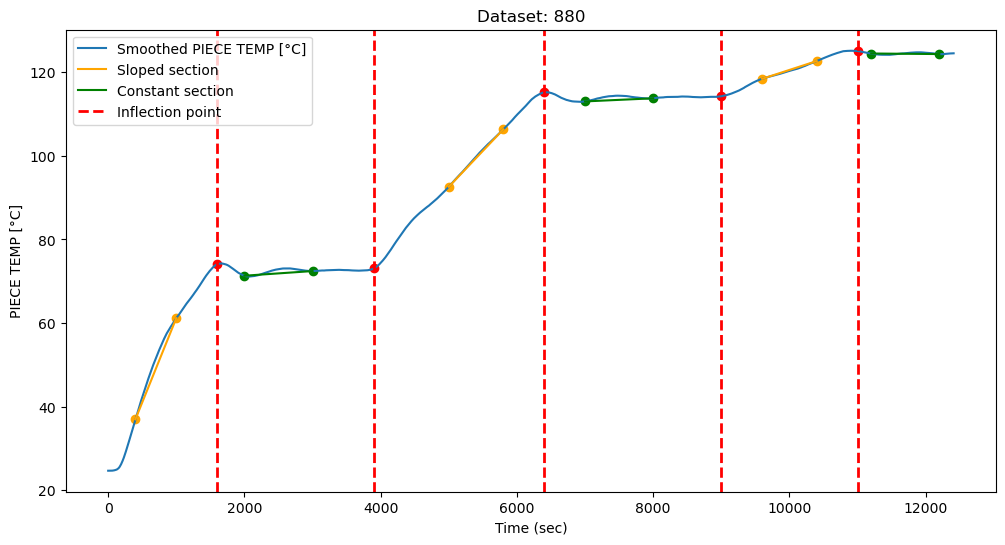

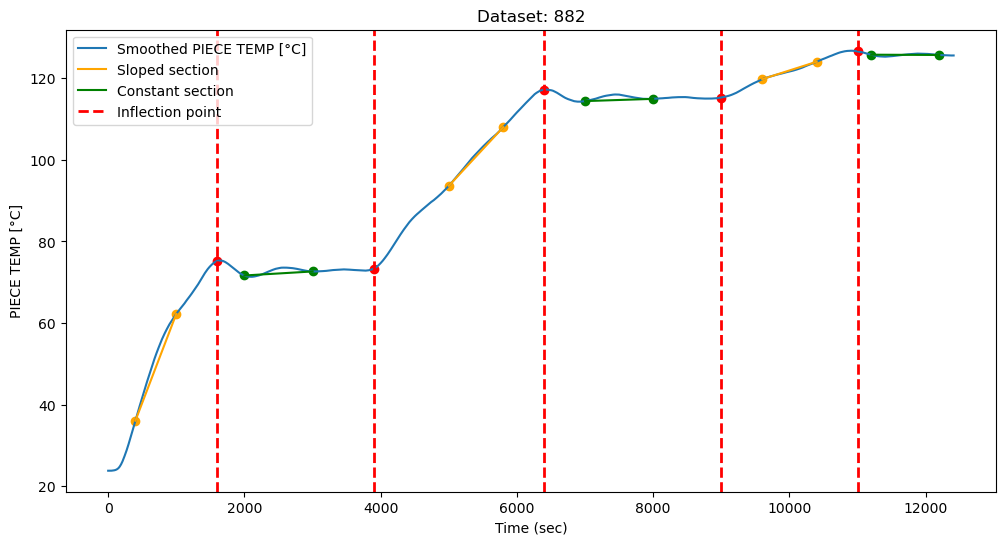

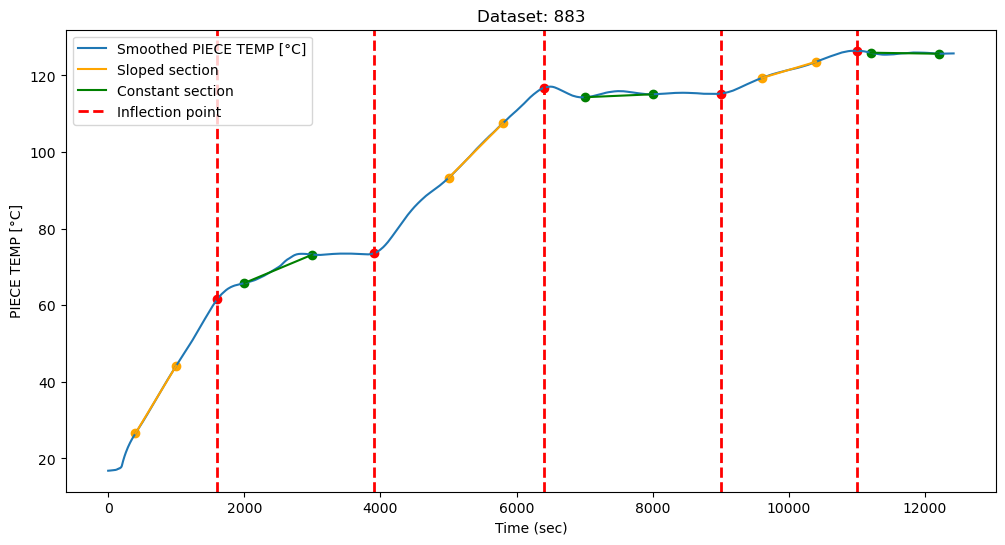

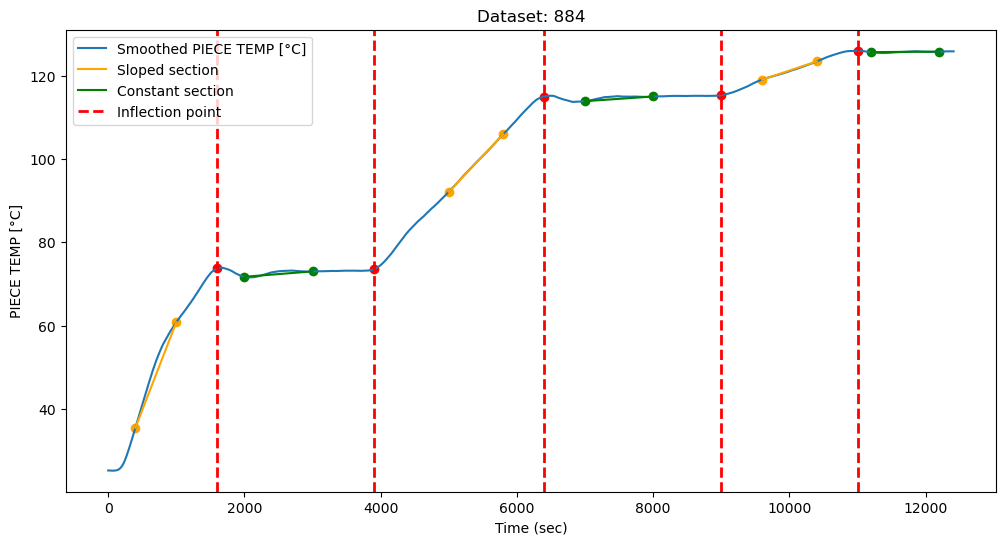

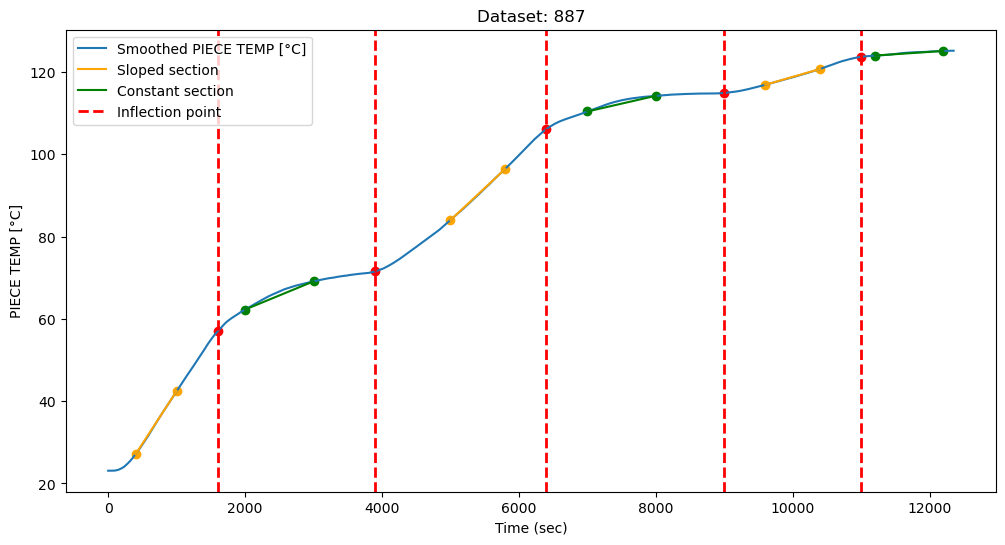

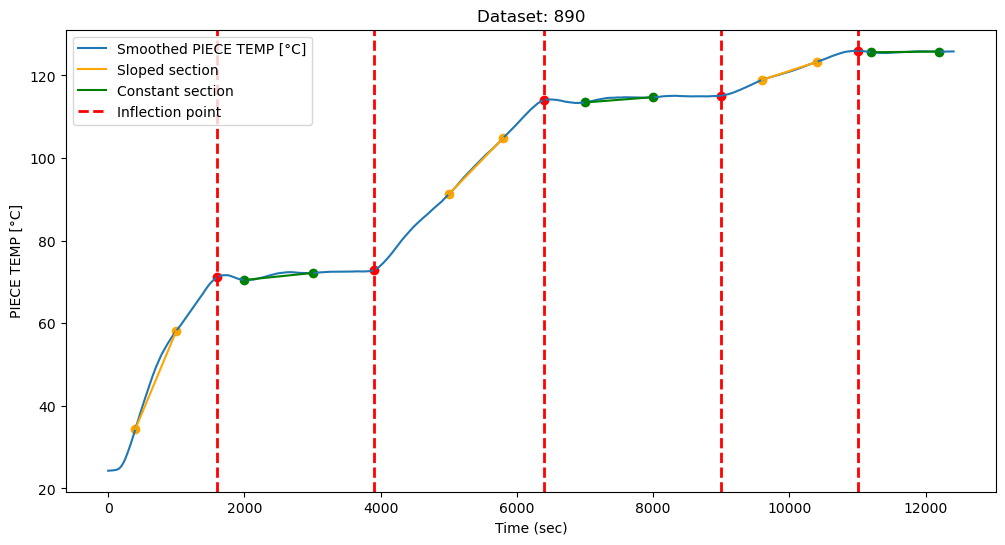

In [33]:

stats_df = pd.DataFrame(columns=['Dataset', 'Min value', 'Max value', 'Slope 1', 'Slope 2', 'Slope 3', 'Const 1', 'Const 2', 'Const 3', 'Inf 1', 'Inf 2', 'Inf 3', 'Inf 4', 'Inf 5'])


for idx, file in enumerate(files):

    stats_df.loc[idx, 'Dataset'] = file
    df = pd.read_excel(f'../../../data/pilots/CFRP production from Cetma Composites/{file}.xlsx')

    alpha = 0.1  # Smoothing parameter (0 < alpha < 1)
    df['Smoothed PIECE TEMP [°C]'] = df['PIECE TEMP [°C]'].ewm(alpha=alpha, adjust=False).mean()
    #df.plot(y='smoothed', legend=False)
    data = df['Smoothed PIECE TEMP [°C]'].values
    # Select the model and method
    model = "rbf"  # Other models could be "l2", "rbf", etc.

    time = df['Time_sec'].values
    temp = df['Smoothed PIECE TEMP [°C]'].values

    # Apply change point detection
    model = "rbf"  # Using RBF model for change point detection
    algo = rpt.Pelt(model=model, min_size=200, jump=10).fit(temp)
    change_points = algo.predict(pen=50)

    # Filter change points to only include significant increases
    filtered_points = []
    for cp in change_points:
        if cp == 0 or cp >= len(temp):
            continue
        if np.mean(temp[cp:cp+10]) > np.mean(temp[cp-10:cp]):
            filtered_points.append(cp)

    # Convert filtered points to actual time values
    filtered_times = time[filtered_points]
    if file in [800, 806, 808, 880, 882, 883, 884, 887, 890]:
        points = np.array([[400, 1000], [5000, 5800], [9600, 10400]])
        constant_points = np.array([[2000, 3000], [7000, 8000], [11200, 12200]])
        inf_points = np.array([[1600], [3900], [6400], [9000], [11000]])
    else:
        points = np.array([[400, 1000], [4200, 6000], [9600, 10600]])
        constant_points = np.array([[2000, 3500], [7000, 8500], [11200, 12200]])
        inf_points = np.array([[1750], [3900], [6500], [9100], [11000]])

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(time, temp, label='Smoothed PIECE TEMP [°C]')
    plt.scatter(points, temp[(points/10).astype(int)], color = 'orange')
    plt.xlabel('Time (sec)')
    plt.ylabel('PIECE TEMP [°C]')
    plt.scatter(constant_points, temp[(constant_points/10).astype(int)], color = 'green')
    plt.scatter(inf_points, temp[(inf_points/10).astype(int)], color = 'red')
    
    plt.title(f'Dataset: {file}')

    stats_df.loc[idx, 'Min value'] = np.min(temp)
    stats_df.loc[idx, 'Max value'] = np.max(temp)

    for j in range(points.shape[0]):

        plt.plot(points[j], temp[(points/10).astype(int)][j], color = 'orange', label = "Sloped section" if j==0 else "" )
        plt.plot(constant_points[j], temp[(constant_points/10).astype(int)][j], color = 'green', label = "Constant section" if j==0 else "")
        plt.axvline(inf_points[j], color='red', linestyle='--', linewidth=2, )


        slope = (temp[(points/10).astype(int)][j,1] - temp[(points/10).astype(int)][j,0])/ (points[j,1] - points[j,0])
        avg = np.mean(temp[(constant_points[j,0]/10).astype(int) : (constant_points[j,1]/10).astype(int)])


        stats_df.loc[idx, f'Slope {j+1}'] = slope
        stats_df.loc[idx, f'Const {j+1}'] = avg
        stats_df.loc[idx, f'Inf {j+1}'] = temp[int(inf_points[j,0]/10)]


    stats_df.loc[idx, f'Inf {4}'] = temp[int(inf_points[3,0]/10)]
    stats_df.loc[idx, f'Inf {5}'] = temp[int(inf_points[4,0]/10)]

    plt.axvline(inf_points[3], color='red', linestyle='--', linewidth=2, )
    plt.axvline(inf_points[4], color='red', linestyle='--', linewidth=2, label='Inflection point')

    plt.legend()
    plt.show()



In [37]:
stats_df.iloc[5:35]

,Dataset,Min value,Max value,Slope 1,Slope 2,Slope 3,Const 1,Const 2,Const 3,Inf 1,Inf 2,Inf 3,Inf 4,Inf 5
5,819,18.799999,125.191411,0.043945,0.017091,0.005634,71.509413,114.435709,125.089415,69.767683,72.376769,112.994136,114.84154,124.879401
6,821,18.6,125.383517,0.044982,0.017172,0.005647,72.222626,114.774874,125.302968,71.066699,72.699027,113.839239,115.126806,125.114501
7,822,16.4,125.499782,0.046543,0.017558,0.00574,72.343511,114.884916,125.385974,71.327241,72.731983,114.26493,115.141385,125.324616
8,824,19.697291,125.395259,0.042274,0.017048,0.005867,71.921581,114.598848,125.299872,70.00588,72.690331,113.3631,115.066407,125.028976
9,825,20.661245,125.922295,0.041662,0.017509,0.005568,73.659897,115.5304,125.643084,72.355746,73.758677,115.107789,115.54293,125.694301
10,826,20.4,125.493144,0.043674,0.017439,0.005642,72.367389,114.97065,125.367939,71.443573,72.796175,114.277018,115.179874,125.315447
11,827,15.6,125.788572,0.04562,0.017752,0.005728,72.257672,115.133622,125.61525,70.584313,72.644423,114.521712,115.275928,125.629532
12,829,17.299999,125.494529,0.045643,0.017244,0.005609,72.354944,114.902976,125.43552,70.997222,72.906069,113.965654,115.207703,125.183049
13,837,21.299999,125.299924,0.041179,0.016844,0.005553,71.551325,114.456344,125.17161,69.115615,72.538326,112.766583,114.920642,124.770141
14,838,21.359048,125.134135,0.039796,0.016856,0.005531,71.41027,114.417938,125.03751,69.237766,72.387331,112.873173,114.979077,124.617416


Chamber temp graphs


In [19]:

# stats_df = pd.DataFrame(columns=['Dataset', 'Min value', 'Max value', 'Slope 1', 'Slope 2', 'Slope 3', 'Const 1', 'Const 2', 'Const 3', 'Inf 1', 'Inf 2', 'Inf 3', 'Inf 4'])


# for idx, file in enumerate(files[3:-8]):

#     stats_df.loc[idx, 'Dataset'] = file
#     df = pd.read_excel(f'../../../data/pilots/CFRP production from Cetma Composites/{file}.xlsx')

#     alpha = 0.1  # Smoothing parameter (0 < alpha < 1)
#     df['Smoothed CHAMBER TEMP. [°C]'] = df['CHAMBER TEMP. [°C]'].ewm(alpha=alpha, adjust=False).mean()
#     #df.plot(y='smoothed', legend=False)
#     data = df['Smoothed CHAMBER TEMP. [°C]'].values
#     # Select the model and method
#     model = "rbf"  # Other models could be "l2", "rbf", etc.

#     time = df['Time_sec'].values
#     temp = df['Smoothed CHAMBER TEMP. [°C]'].values

#     # Apply change point detection
#     model = "rbf"  # Using RBF model for change point detection
#     algo = rpt.Pelt(model=model, min_size=200, jump=10).fit(temp)
#     change_points = algo.predict(pen=50)

#     # Filter change points to only include significant increases
#     filtered_points = []
#     for cp in change_points:
#         if cp == 0 or cp >= len(temp):
#             continue
#         if np.mean(temp[cp:cp+10]) > np.mean(temp[cp-10:cp]):
#             filtered_points.append(cp)

#     # Convert filtered points to actual time values
#     filtered_times = time[filtered_points]
#     if file in [800, 806, 808, 880, 882, 883, 884, 887, 890]:
#         points = np.array([[400, 1000], [5000, 5800], [9600, 10400]])
#         constant_points = np.array([[2000, 3000], [7000, 8000], [11200, 12200]])
#         inf_points = np.array([[1600], [3900], [6400], [9000]])
#     else:
#         points = np.array([[400, 800], [5000, 5800], [9600, 10400]])
#         constant_points = np.array([[2000, 3500], [7000, 8500], [11200, 12200]])
#         inf_points = np.array([[1600], [3900], [6500], [9100]])

#     # Plot the results
#     plt.figure(figsize=(12, 6))
#     plt.plot(time, temp, label='Smoothed CHAMBER TEMP. [°C]')
#     plt.scatter(points, temp[(points/10).astype(int)], color = 'red')
    
#     plt.scatter(constant_points, temp[(constant_points/10).astype(int)], color = 'green')
#     plt.scatter(inf_points, temp[(inf_points/10).astype(int)], color = 'black')
#     plt.title(f'Dataset: {file}')

#     stats_df.loc[idx, 'Min value'] = np.min(temp)
#     stats_df.loc[idx, 'Max value'] = np.max(temp)

#     for j in range(points.shape[0]):

#         plt.plot(points[j], temp[(points/10).astype(int)][j], color = 'red')
#         plt.plot(constant_points[j], temp[(constant_points/10).astype(int)][j], color = 'green')

#         slope = (temp[(points/10).astype(int)][j,1] - temp[(points/10).astype(int)][j,0])/ (points[j,1] - points[j,0])
#         avg = np.mean(temp[(constant_points[j,0]/10).astype(int) : (constant_points[j,1]/10).astype(int)])


#         stats_df.loc[idx, f'Slope {j+1}'] = slope
#         stats_df.loc[idx, f'Const {j+1}'] = avg
#         stats_df.loc[idx, f'Inf {j+1}'] = temp[int(inf_points[j,0]/10)]


#     stats_df.loc[idx, f'Inf {4}'] = temp[int(inf_points[3,0]/10)]


In [20]:
#stats_df.iloc[10:30]